# 1. Define the Problem
Clearly define the problem you want to solve. Understand the type of task you're addressing, such as classification, regression, clustering, or reinforcement learning.

# 2. Import all the required library

In [1]:
# Import all library required for Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from scipy import stats
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import plotly.graph_objects as go
import dash
from dash import Dash, html, dcc
from dash.dependencies import Input, Output
import plotly.express as px

import statistics as stat
from scipy import stats

from sklearn.preprocessing import LabelEncoder   
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import StandardScaler

import warnings

# 3. Environment setup

#### Styles from matlpotlib

In [2]:
# list of available styles in matplotlib
print(plt.style.available)

#use of style 
plt.style.use('fivethirtyeight')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


#### Set option in pandas to display all rows and columns in dataset

In [3]:
# set pandas display options for rows and columns
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns',None)

#### Ignore library Deprecated warning messages

In [4]:
# define function
def ignore_warning():
    return warnings.filterwarnings(action='ignore')

# call function
ignore_warning()

# 4. Data Collection
Collect relevant and representative data for your problem. Explore the data to understand its structure, distribution, and potential challenges. Identify and address issues like 
missing values,
outliers,
and data imbalances.

### 4.1. Load Datasets

#### Function to load datasets

In [5]:
# define function
    
def load_datasets(dataset, delimiter=','):
    
    if isinstance(dataset, str):
        try:
            return pd.read_csv(dataset, delimiter=delimiter, encoding='utf-8')
        
        except:
            return "Filepath or URL is incorrect"
    else:
        print("URL or Filepath should be string")
        

### 4.2. Dataset of Traffic volume in Dublin October 2023

In [6]:
# call function to get traffic volume based on region dataset
traffic_volume_df = load_datasets(r"./datasets/traffic_volumes_oct_2023.csv")
# https://data.gov.ie/dataset/dcc-scats-detector-volume-jul-dec-2023

### 4.3. Datasets of Passanger Journey by Luas

In [7]:
pass_journey_by_luas_df = load_datasets(r"./datasets/passenger_journeys_by_luas.csv")
# https://data.gov.ie/dataset/toa11-luas-passenger-numbers/resource/3915960b-fe0d-41b8-9316-d9b9ce0ca816

### 4.4. Datasets of Passanger Journey by Public Transport

In [8]:
pass_journey_by_public_transport_df = load_datasets(r"./datasets/passenger_journeys_by_public_transport.csv")
# https://data.gov.ie/dataset/tha24-passenger-journeys-by-public-transport

### 4.5. Datasets of Passangers handled by Main Airports for Ireland

In [9]:
pass_hand_by_airports_df = load_datasets(r"./datasets/passengers_handled_by_main_airports.csv")
# https://data.gov.ie/dataset/tam06-passengers-handled-by-main-airports

### 4.6. Dataset of Transport Infrastructure i.e National Route Length

In [10]:
national_route_length_df = load_datasets(r"./datasets/national_road_length_2015_22.csv")
# https://data.gov.ie/dataset/nra03-national-route-length

### 4.7. Dataset of Passanger entrance in Metrol and RER(Rail) in Paris France 2013-2021

In [11]:
traffic_annual_entrance_2013_df = load_datasets(r"./datasets/paris_rail_dataset/traffic_annual_entrance_per_station_2013.csv",delimiter=';')
traffic_annual_entrance_2014_df = load_datasets(r"./datasets/paris_rail_dataset/traffic_annual_entrance_per_station_2014.csv",delimiter=';')
traffic_annual_entrance_2015_df = load_datasets(r"./datasets/paris_rail_dataset/traffic_annual_entrance_per_station_2015.csv",delimiter=';')
traffic_annual_entrance_2016_df = load_datasets(r"./datasets/paris_rail_dataset/traffic_annual_entrance_per_station_2016.csv",delimiter=';')
traffic_annual_entrance_2017_df = load_datasets(r"./datasets/paris_rail_dataset/traffic_annual_entrance_per_station_2017.csv",delimiter=';')
traffic_annual_entrance_2018_df = load_datasets(r"./datasets/paris_rail_dataset/traffic_annual_entrance_per_station_2018.csv",delimiter=';')
traffic_annual_entrance_2019_df = load_datasets(r"./datasets/paris_rail_dataset/traffic_annual_entrance_per_station_2019.csv",delimiter=';')
traffic_annual_entrance_2020_df = load_datasets(r"./datasets/paris_rail_dataset/traffic_annual_entrance_per_station_2020.csv",delimiter=';')
traffic_annual_entrance_2021_df = load_datasets(r"./datasets/paris_rail_dataset/traffic_annual_entrance_per_station_2021.csv",delimiter=';')
# https://data.ratp.fr/explore/?sort=modified

### 4.8. Dataset of Passanger travel by Rail in Ireland 

In [12]:
passenger_journey_by_rail_irl_df = load_datasets(r"./datasets/passenger_journeys_by_rail(thousand).csv")
# https://data.gov.ie/dataset/tca01-passenger-journeys-by-rail-thousand

# 5. Data Preparation and Visualization

### 5.1. EDA (Exploratory Data Analysis) for traffic_volumes_oct_2023.

#### 5.1.1. Shape of Dataset


In [13]:
# Dimensions of dataset
traffic_volume_df.shape

(10620233, 9)

#### 5.1.2. First 10 observation

In [14]:
traffic_volume_df.head(10)

End_Time Region  Site  Detector  Sum_Volume  Avg_Volume  \
0  20231006210000    IRE  6306         8         111           9   
1  20231006210000    IRE  6306         9         109           9   
2  20231006210000    IRE  6306        10           0           0   
3  20231006210000    IRE  6306        11           0           0   
4  20231006210000    IRE  6306        12          15           1   
5  20231006210000    IRE  6306        13          68           5   
6  20231006210000    IRE  6306        14          57           4   
7  20231006210000    IRE  6306        15          10           0   
8  20231006210000    IRE  6306        16           7           0   
9  20231006210000    IRE  6306        17           0           0   

   Weighted_Avg  Weighted_Var  Weighted_Std_Dev  
0           NaN           NaN               NaN  
1           NaN           NaN               NaN  
2           NaN           NaN               NaN  
3           NaN           NaN               NaN  
4           NaN           NaN               NaN  
5           NaN           NaN               NaN  
6           NaN           NaN               NaN  
7           NaN           NaN               NaN  
8           NaN           NaN               NaN  
9           NaN           NaN               NaN

#### 5.1.3. Check is there null value on dataset

In [15]:
# isna().sum() or isnull().sum() provide sum of null value in each column in datasets
traffic_volume_df.isnull().sum()

End_Time                   0
Region                     0
Site                       0
Detector                   0
Sum_Volume                 0
Avg_Volume                 0
Weighted_Avg        10620233
Weighted_Var        10620233
Weighted_Std_Dev    10620233
dtype: int64

#### 5.1.4. Drop null column and column not required for analysis

In [16]:
# droped column Weighted_Avg,Weighted_Var,Weighted_Std_Dev because is has null observation
traffic_volume_df.dropna(axis=1, inplace=True)

# column like Site,Detector and Avg_Volume not required for observation for now
traffic_volume_df.drop(columns=['Detector'], inplace=True)

#### 5.1.5. Gives information about dataset

In [17]:
# info() provide information about datasets
traffic_volume_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10620233 entries, 0 to 10620232
Data columns (total 5 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   End_Time    int64 
 1   Region      object
 2   Site        int64 
 3   Sum_Volume  int64 
 4   Avg_Volume  int64 
dtypes: int64(4), object(1)
memory usage: 405.1+ MB


#### 5.1.6. Function to create dictionary of existing and new columns name i.e {old: new}

In [18]:
# rename columns name i.e no space should be in columns name
# use of try and except to handle if value list has not appropriate length for column
def columns_dict(data_frame, new_column_name):
    new_col_dict = {}
    
    if len(new_column_name) == len(data_frame.columns):
        try:
            for i in range(len(new_column_name)):
                new_col_dict[data_frame.columns[i]] = new_column_name[i]
        except:
            print("An error occurred while creating the column dictionary.")
    else:
        print(f"Your length of Dataframe {len(data_frame.columns)} != {len(new_column_name)} with length of New Column ")
    
    return new_col_dict

#### 5.1.7. Rename column name 

In [19]:
# inplace = True set the values permenantly so that we can use new columns name
new_column_name = ['finished_time','region','site','sum_traffic_volume','avg_vol_per_5mint']
col_dict = columns_dict(traffic_volume_df, new_column_name)
traffic_volume_df.rename(columns=col_dict, inplace=True)
traffic_volume_df.head()

finished_time region  site  sum_traffic_volume  avg_vol_per_5mint
0  20231006210000    IRE  6306                 111                  9
1  20231006210000    IRE  6306                 109                  9
2  20231006210000    IRE  6306                   0                  0
3  20231006210000    IRE  6306                   0                  0
4  20231006210000    IRE  6306                  15                  1

#### 5.1.8. Count total observation in each column

In [20]:
# count total items in each column
traffic_volume_df.count()

finished_time         10620233
region                10620233
site                  10620233
sum_traffic_volume    10620233
avg_vol_per_5mint     10620233
dtype: int64

#### 5.1.9. Check Duplicated value

In [21]:
# count duplicated value in dataset
traffic_volume_df.duplicated().sum()

6415051

#### 5.1.10. Drop Duplicated value

In [22]:
traffic_volume_df.drop_duplicates(inplace=True)

#### 5.1.11. Check dulicated Value

In [23]:
# count duplicated value in dataset
traffic_volume_df.duplicated().sum()

0

#### 5.1.12. Check null Value

In [24]:
traffic_volume_df.isna().sum()

finished_time         0
region                0
site                  0
sum_traffic_volume    0
avg_vol_per_5mint     0
dtype: int64

#### 5.1.13. Information about dataset after removing duplicated value

In [25]:
# info() provide information about datasets
traffic_volume_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4205182 entries, 0 to 10620232
Data columns (total 5 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   finished_time       int64 
 1   region              object
 2   site                int64 
 3   sum_traffic_volume  int64 
 4   avg_vol_per_5mint   int64 
dtypes: int64(4), object(1)
memory usage: 192.5+ MB


#### 5.1.14. Describe the stastical value of dataset

In [26]:
# describe() generate statistical descriptive value of dataset
traffic_volume_df.describe()

finished_time          site  sum_traffic_volume  avg_vol_per_5mint
count   4.205182e+06  4.205182e+06        4.205182e+06       4.205182e+06
mean    2.023102e+13  2.388866e+03        1.152404e+02       9.292727e+00
std     8.932211e+06  2.629677e+03        1.519643e+02       1.325533e+01
min     2.023100e+13  1.000000e+00        0.000000e+00       0.000000e+00
25%     2.023101e+13  2.010000e+02        9.000000e+00       0.000000e+00
50%     2.023102e+13  7.690000e+02        5.500000e+01       4.000000e+00
75%     2.023102e+13  6.025000e+03        1.700000e+02       1.400000e+01
max     2.023103e+13  9.998000e+03        3.035000e+03       1.053000e+03

#### 5.1.15. Convert finished_time column from Int to Date and time datatype

In [27]:
traffic_volume_df['finished_time'] = pd.to_datetime(traffic_volume_df['finished_time'], format='%Y%m%d%H%M%S')
traffic_volume_df.head()

finished_time region  site  sum_traffic_volume  avg_vol_per_5mint
0 2023-10-06 21:00:00    IRE  6306                 111                  9
1 2023-10-06 21:00:00    IRE  6306                 109                  9
2 2023-10-06 21:00:00    IRE  6306                   0                  0
4 2023-10-06 21:00:00    IRE  6306                  15                  1
5 2023-10-06 21:00:00    IRE  6306                  68                  5

#### 5.1.16. Unique value in region column

In [28]:
# unique region at region column
traffic_volume_df['region'].unique()

array(['IRE', 'WCITY1', 'CCITY', 'NCITY', 'IRE3', 'DCC1', 'SCITY'],
      dtype=object)

### 5.2. function for graph attributes

In [29]:
def graph_label(ticksfont, x_label, y_label, title_label, fontsize):
    plt.xticks(fontsize=ticksfont)
    plt.yticks(fontsize=ticksfont) 
    plt.xlabel(x_label, fontsize=fontsize)
    plt.ylabel(y_label, fontsize=fontsize) 
    plt.title(title_label, fontsize=fontsize)
    plt.show()
    
def graph_size(width=12, height=8):
    plt.figure(figsize=(width,height))

#### 5.1.17. Select region CCITY-> Center City, SCITY-> South City, NCITY-> North City

In [30]:
traffic_vol_snc_city_df = traffic_volume_df[traffic_volume_df['region'].isin(['NCITY','SCITY','CCITY'])].reset_index(drop=True)
traffic_vol_snc_city_df.shape

(2043886, 5)

In [31]:
traffic_vol_snc_city_df = traffic_vol_snc_city_df.groupby(['finished_time','region'], as_index=False)['sum_traffic_volume','avg_vol_per_5mint'].sum()
traffic_vol_snc_city_df.head()

finished_time region  sum_traffic_volume  avg_vol_per_5mint
0 2023-10-01 00:00:00  CCITY               61422               4834
1 2023-10-01 00:00:00  NCITY               79195               6223
2 2023-10-01 00:00:00  SCITY               66300               5235
3 2023-10-01 01:00:00  CCITY               55934               4382
4 2023-10-01 01:00:00  NCITY               68401               5310

### 5.3. Function for modfiy legend

In [32]:
def update_legend(fig):
    new_region_names = {"CCITY": "Center City", "NCITY":"North City", "SCITY": "South City"}
    fig.for_each_trace(lambda t: t.update(name = new_region_names[t.name],
                                      legendgroup = new_region_names[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, new_region_names[t.name])))
    

### 5.4 Function for Box Plot

In [33]:
# box plot function
def box_plot(data_frame, x_value, y_value, color_value, graph_title,xaxis_title,yaxis_title, xtick=[]):
    fig = px.box(
        data_frame, 
        x=x_value, 
        y=y_value, 
        color= color_value, 
        width=950, 
        height=650,
        title= graph_title
    ).update_layout(xaxis_title=xaxis_title, yaxis_title=yaxis_title)
    if len(xtick):
        fig.update_xaxes(tickvals=[0,1,2], ticktext=xtick)
        update_legend(fig)
    fig.show()

#### 5.1.18. Function call to plot Box lot

In [34]:
box_plot(
    data_frame = traffic_vol_snc_city_df,
    x_value= 'region',
    y_value='sum_traffic_volume', 
    color_value='region',
    graph_title="Sum of Traffic Volume in Dublin City Vs Region",
    xaxis_title="Regions",
    yaxis_title="Sum of Traffic Volume in Thousands",
    xtick=['Center City', 'North City', 'South City']
)

#### 5.1.19. Histplot to see the distribution of data

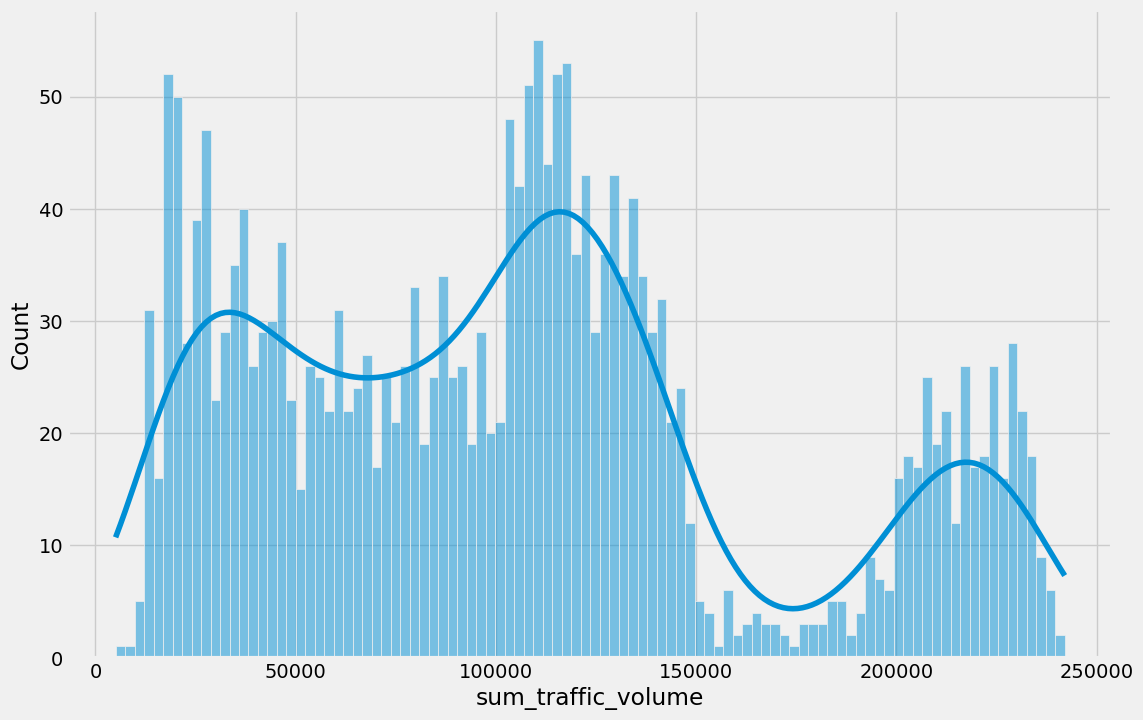

In [35]:
graph_size()
sns.histplot(data=traffic_vol_snc_city_df, x='sum_traffic_volume', kde=True, bins=100);

#### 5.1.20. Scatter plot to see the correlations between data

In [36]:
fig_scatter_traffic = px.scatter(traffic_vol_snc_city_df, x="sum_traffic_volume", y="avg_vol_per_5mint", color="region")
fig_scatter_traffic.update_layout(xaxis_title="Sum of Traffic Volume", yaxis_title="Avg Traffic Volume Per 5 Minutes")
fig_scatter_traffic.show()

#### 5.1.21. Pairplot to see data from different perspectives and to fine the correlations

In [37]:
fig_scatter_matrix_traffic = px.scatter_matrix(traffic_vol_snc_city_df,
                        width=950, 
                        height=800,
                        color="region"
                       )
update_legend(fig_scatter_matrix_traffic)
fig_scatter_matrix_traffic.show()

#### 5.1.22. Add column for days in week and hours

In [38]:
traffic_vol_snc_city_df['day_of_week'] = traffic_vol_snc_city_df['finished_time'].dt.day_name()
traffic_vol_snc_city_df['hour_in_day'] = traffic_vol_snc_city_df['finished_time'].dt.hour
traffic_vol_snc_city_df.head()

finished_time region  sum_traffic_volume  avg_vol_per_5mint  \
0 2023-10-01 00:00:00  CCITY               61422               4834   
1 2023-10-01 00:00:00  NCITY               79195               6223   
2 2023-10-01 00:00:00  SCITY               66300               5235   
3 2023-10-01 01:00:00  CCITY               55934               4382   
4 2023-10-01 01:00:00  NCITY               68401               5310   

  day_of_week  hour_in_day  
0      Sunday            0  
1      Sunday            0  
2      Sunday            0  
3      Sunday            1  
4      Sunday            1

In [39]:
days = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
peak_hours = traffic_vol_snc_city_df.groupby(['day_of_week','hour_in_day'])['sum_traffic_volume'].mean().unstack().reindex(days)
peak_hours

hour_in_day            0             1             2             3   \
day_of_week                                                           
Monday       53713.400000  39763.133333  26634.200000  23707.000000   
Tuesday      45566.133333  33343.600000  22216.666667  18893.200000   
Wednesday    53066.333333  33938.583333  21950.833333  17884.583333   
Thursday     60079.250000  40796.583333  26735.500000  21116.833333   
Friday       70615.000000  51703.416667  36308.250000  29199.166667   
Saturday     77687.666667  64238.583333  52577.583333  44529.333333   
Sunday       73376.866667  63668.800000  55168.533333  48744.266667   

hour_in_day            4             5             6              7   \
day_of_week                                                            
Monday       20753.200000  24074.866667  39989.600000   88977.733333   
Tuesday      17585.666667  20562.333333  40807.333333  102357.000000   
Wednesday    16512.250000  20451.000000  40850.250000  102151.000000   
Thursday     19453.416667  21210.000000  42386.000000  101926.416667   
Friday       26965.916667  26782.750000  43011.833333   96667.250000   
Saturday     40021.500000  30722.833333  30287.583333   50179.500000   
Sunday       43372.200000  33862.000000  26747.866667   36440.400000   

hour_in_day             8              9   ...             14             15  \
day_of_week                                ...                                 
Monday       127064.533333  137984.000000  ...  145900.200000  146396.866667   
Tuesday      147760.400000  160244.666667  ...  152215.133333  151126.066667   
Wednesday    150782.916667  161335.833333  ...  157039.500000  157285.250000   
Thursday     147713.250000  163475.250000  ...  157064.666667  157908.166667   
Friday       141833.916667  160279.416667  ...  162511.916667  164019.083333   
Saturday      70854.333333   93127.416667  ...  155664.833333  155539.416667   
Sunday        53637.666667   62029.200000  ...  146153.133333  143233.600000   

hour_in_day             16             17             18             19  \
day_of_week                                                               
Monday       151490.866667  156418.666667  158418.466667  147078.533333   
Tuesday      159212.066667  163855.200000  166166.466667  156497.066667   
Wednesday    161921.166667  164279.916667  167916.916667  162809.500000   
Thursday     162922.416667  165481.083333  167872.333333  164804.500000   
Friday       165988.500000  165587.000000  165665.833333  161437.083333   
Saturday     153313.750000  152258.000000  152020.750000  148687.083333   
Sunday       144550.857143  141397.600000  140303.866667  136258.666667   

hour_in_day             20             21             22            23  
day_of_week                                                             
Monday       129963.866667  105162.733333   85052.533333  65179.466667  
Tuesday      139661.133333  112458.533333   90523.800000  73470.933333  
Wednesday    151584.083333  119712.916667   98198.166667  82026.333333  
Thursday     155727.833333  127839.500000  104864.416667  92644.416667  
Friday       150573.166667  124079.166667  103061.083333  98969.333333  
Saturday     137956.000000  102761.250000   81901.083333  92733.750000  
Sunday       123939.000000  101800.533333   79013.533333  67809.866667  

[7 rows x 24 columns]

#### 5.1.23. Heat Map to visualize traffic Day of week vs Time 

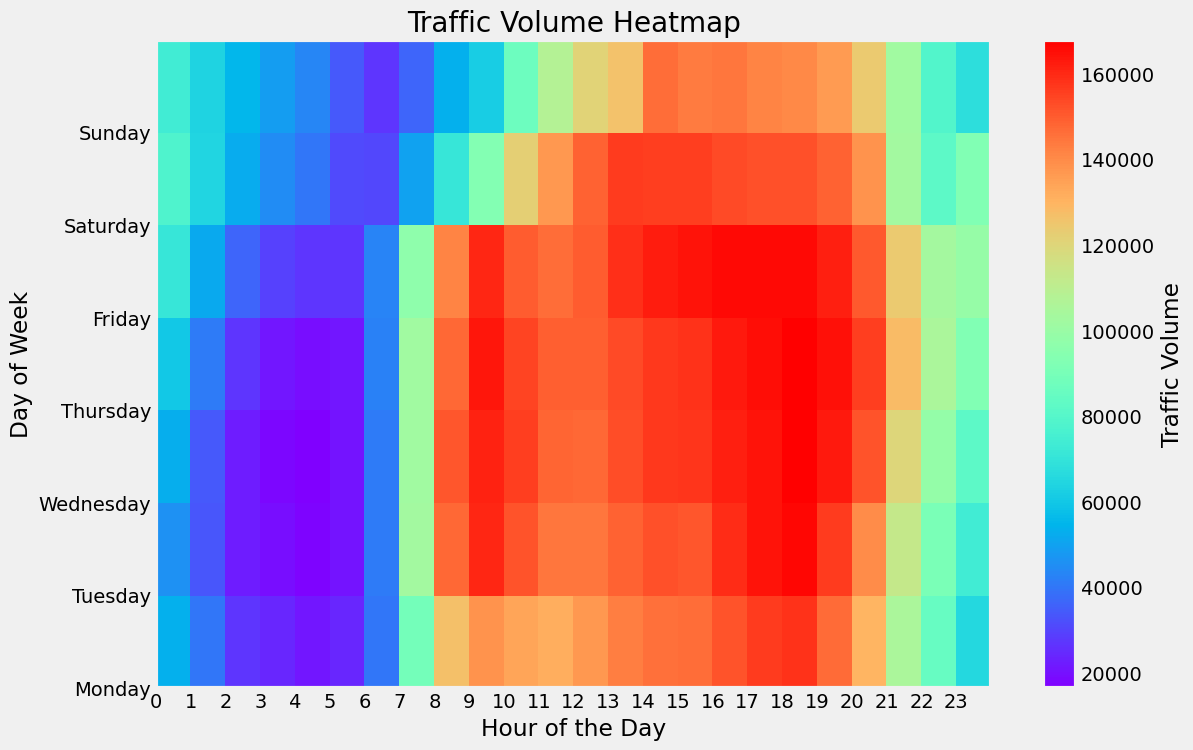

In [40]:
graph_size()
plt.pcolor(peak_hours, cmap='rainbow')
plt.colorbar(label='Traffic Volume')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of Week')
plt.title('Traffic Volume Heatmap')
plt.xticks(range(24),labels=range(24))
plt.yticks(range(7), labels=peak_hours.index)
plt.show()


#### 5.1.24. Select the features which have a high correlation with our target variable weight with threshold 80K coefficeient value

In [41]:
# def get_high_correleted_feature(corr_data, threshold):
#     feature = []
#     value = []
#     for i, index in. enumerate(corr_data.index):
#         if abs(corr_data[index]) > threshold:
#             feature.append(index)
#             value.append(corr_data[index])
#         df = pd.DataFrame(data = value, index= feature, columns=['High Corr Value'])
#         return df
    
# threshold = 80000
# corr_value = get_high_correleted_feature(peak_hours[peak_hours['']])
    

In [42]:
day_of_week = peak_hours.index
hour_of_days = peak_hours.columns

fig_scatter_avg_traffic = px.scatter(peak_hours,
              x =  day_of_week,
              y = hour_of_days,
              size='value',
              size_max=50,
              labels=dict(index="Day of Week", Value= "Sum of Traffic Volume"),
              title="Average Traffic Volume by Hour and Days of Week")
fig_scatter_avg_traffic.update_layout(xaxis_title="Days in Week", yaxis_title="Avg Traffic Volume in Thousands")
fig_scatter_avg_traffic.show()

#### 5.1.25. Line graph to visualize number of traffic on road on days and time

In [43]:
fig_line_avg_traffic = px.line(peak_hours,
                               x =  day_of_week,
                               y = hour_of_days,
                               markers=True,
                               labels=dict(index="Day of Week", Value= "Sum of Traffic Volume"),
                               title="Average Traffic Volume by Hour and Days of Week")
fig_line_avg_traffic.update_layout(xaxis_title="Days in Week", yaxis_title="Avg Traffic Volume in Thousands")
fig_line_avg_traffic.show()

#### 5.1.26. Line graph to visualize number of traffic on 3 area of Dublin City i.e Center, North, South City

In [44]:
fig_line_sum_traffic = px.line(traffic_vol_snc_city_df,
                               x="finished_time",
                               y="sum_traffic_volume",
                               color='region',
#                                symbol='region',
                               title="Traffic Volume In Center City, North City and South City of Dublin in October 2023"
                              ).update_layout(xaxis_title="Finished Date/Time", yaxis_title="Traffic Volume in Thousands")
update_legend(fig_line_sum_traffic)
fig_line_sum_traffic.show()

### 5.5. Function to plot scatter_plot

In [45]:
def scatter_plot(data_frame, x_axis, y_axis, color):
    fig = px.scatter(data_frame, x=x_axis,  y=y_axis, color=color)
    fig.show()

## EDA For datasets Passanger Journey by Luas

In [46]:
pass_journey_by_luas_df.head()

STATISTIC Statistic Label  TLIST(A1)  Year C01885V02316     Month    UNIT  \
0  TOA11C01        Red line       2018  2018           01   January  Number   
1  TOA11C01        Red line       2018  2018           02  February  Number   
2  TOA11C01        Red line       2018  2018           03     March  Number   
3  TOA11C01        Red line       2018  2018           04     April  Number   
4  TOA11C01        Red line       2018  2018           05       May  Number   

     VALUE  
0  1664495  
1  1657562  
2  1661098  
3  1794424  
4  1934553

#### Dimensions  of Dataset

In [47]:
pass_journey_by_luas_df.shape

(195, 8)

#### Check for Is dataset has null value

In [48]:
pass_journey_by_luas_df.isna().sum()

STATISTIC          0
Statistic Label    0
TLIST(A1)          0
Year               0
C01885V02316       0
Month              0
UNIT               0
VALUE              0
dtype: int64

#### Check for Is dataset has duplicated value

In [49]:
pass_journey_by_luas_df.duplicated().sum()

0

#### Drop column not required for analysis

In [50]:
pass_journey_by_luas_df.drop(columns=['STATISTIC','TLIST(A1)', 'C01885V02316','UNIT'], inplace=True)

In [51]:
pass_journey_by_luas_df.head()

Statistic Label  Year     Month    VALUE
0        Red line  2018   January  1664495
1        Red line  2018  February  1657562
2        Red line  2018     March  1661098
3        Red line  2018     April  1794424
4        Red line  2018       May  1934553

#### Rename column name 

In [52]:
new_column_name = ['line_type','year','month','passenger']
col_dict = columns_dict(pass_journey_by_luas_df, new_column_name)
pass_journey_by_luas_df.rename(columns=col_dict, inplace=True)
pass_journey_by_luas_df.head()


line_type  year     month  passenger
0  Red line  2018   January    1664495
1  Red line  2018  February    1657562
2  Red line  2018     March    1661098
3  Red line  2018     April    1794424
4  Red line  2018       May    1934553

#### Check outlier 

In [53]:
box_plot(
    data_frame = pass_journey_by_luas_df,
    x_value= 'year',
    y_value='passenger', 
    color_value='month',
    graph_title="Passanger Travel by Luas Vs Year",
    xaxis_title="Year",
    yaxis_title="Number of Passanger",
    xtick=[]
)

#### Pairplot to see data from different perspectives

In [54]:
fig_scatter_matrix_luas = px.scatter_matrix(pass_journey_by_luas_df,
                        width=950, 
                        height=800,
                        color="line_type"
                       )
fig_scatter_matrix_luas.show()

#### Plot Histogram to see the distribution of data

In [55]:
fig_histogram_luas = px.histogram(pass_journey_by_luas_df, x="passenger")
fig_histogram_luas.show()

#### Boxplot to see outliers in passanger column

In [56]:
fig_box_luas = px.box(pass_journey_by_luas_df, y="passenger")
fig_box_luas.show()

#### Function to remove outliers

In [57]:
# Function to remove outliers from datasets by using IQR (Interquartile Range)

def remove_outliers(dataframe, col_name):
    try: 
        Q1 = dataframe[col_name].quantile(0.25)
        Q3 = dataframe[col_name].quantile(0.75)
        IQR = Q3-Q1 
        lower_limit = Q1 - 1.5*IQR
        upper_limit = Q3 + 1.5*IQR
        print('IQR',IQR)
        print('lower_limit',lower_limit)
        print('upper_limit',upper_limit)
        new_data = dataframe[(dataframe[col_name] > lower_limit) & (dataframe[col_name] < upper_limit)]
        return new_data

    except:
        print("Dataframe or Column name incorrect")
        

In [58]:
# 1st degree outliers remove
no_outliers_pass_journey_by_luas_df = remove_outliers(pass_journey_by_luas_df, 'passenger')

IQR 1763632.0
lower_limit -1523448.5
upper_limit 5531079.5


#### After removing Outliers from pass_journey_by_luas_df

In [59]:
box_plot(
    data_frame = no_outliers_pass_journey_by_luas_df,
    x_value= 'year',
    y_value='passenger', 
    color_value='month',
    graph_title="Passanger Travel by Luas Vs Year",
    xaxis_title="Year",
    yaxis_title="Number of Passanger",
    xtick=[]
)

In [60]:
fig_box_plot_luas = px.box(no_outliers_pass_journey_by_luas_df, y="passenger")
fig_box_plot_luas.show()

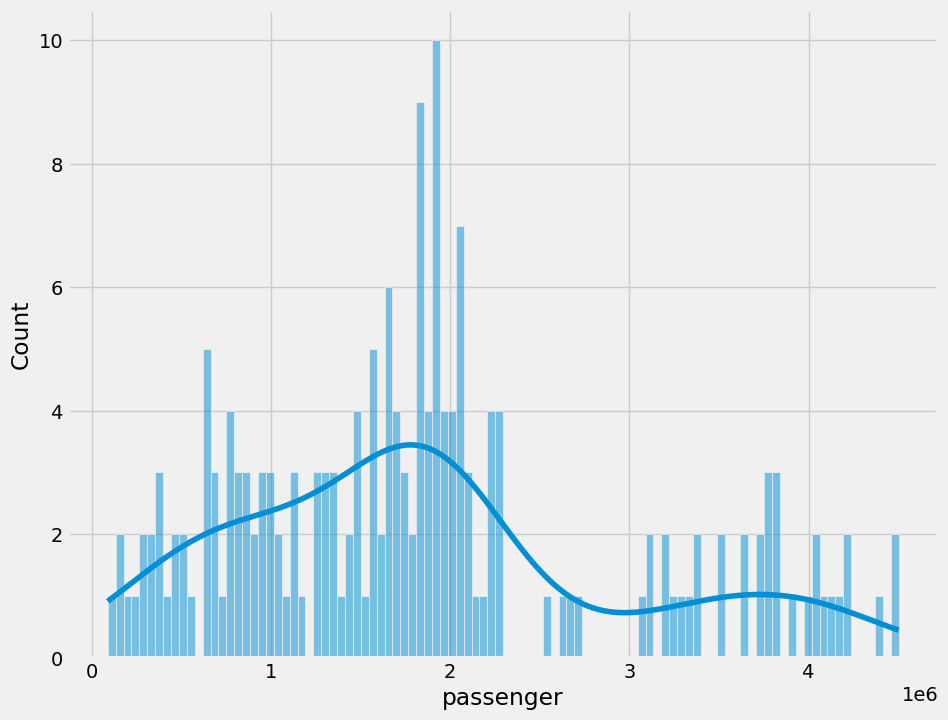

In [61]:
plt.figure(figsize=(10,8))
sns.histplot(data=no_outliers_pass_journey_by_luas_df, x='passenger', kde=True, bins=100);

In [62]:
fig_histogram_luas = px.histogram(no_outliers_pass_journey_by_luas_df, x="passenger")
fig_histogram_luas.show()

In [63]:
line_fig_luas = px.line(no_outliers_pass_journey_by_luas_df, 
                        x='month', 
                        y='passenger',
                        color='year', 
                        facet_col='line_type',
                        symbol='year',
                        labels=dict(passenger="Number of Passenger", month="Months"),
                   title='Trend of Number of Passenger Traveled in Luas by Line Type, Year, and Month')
line_fig_luas.show()

In [64]:
bar_fig_luas = px.bar(no_outliers_pass_journey_by_luas_df, 
                   x='year', 
                   y='passenger',
                   color='year', 
                   facet_col='line_type',
                   text_auto='0.3s',
                   labels=dict(passenger="Number of Passenger", month="Months"),
                   title='Trend of Number of Passenger Traveled in Luas by Line Type and Year')
bar_fig_luas.show()

### Grouped bar chart

In [65]:
grouped_bar_fig_luas = px.bar(no_outliers_pass_journey_by_luas_df,
                        x='month',
                        y='passenger',
                        color='line_type',
                        barmode='group',
                        text_auto='0.3s',
                        color_discrete_map={'Red line':'#DE555B', 'Green line': '#49A26C', 'All Luas lines': '#48AAAD'},
                        labels=dict(passenger="Number of Passenger", month="Months"),
                        title='Trend of Number of Passenger Travelled in Luas by Line Type and Month'
                        )
grouped_bar_fig_luas.show()

## EDA For datasets Passanger Journey by Public Transport

In [66]:
pass_journey_by_public_transport_df.head()

STATISTIC     Statistic Label TLIST(W1)          Week  C03935V04687  \
0  THA25C01  Passenger Journeys   2019W01  2019 Week 01            10   
1  THA25C01  Passenger Journeys   2019W01  2019 Week 01            20   
2  THA25C01  Passenger Journeys   2019W01  2019 Week 01            30   
3  THA25C01  Passenger Journeys   2019W01  2019 Week 01            40   
4  THA25C01  Passenger Journeys   2019W02  2019 Week 02            10   

                      Mode of Transport    UNIT      VALUE  
0                      Dublin Metro Bus  Number  1987891.0  
1           Bus, excluding Dublin Metro  Number   497598.0  
2                                  Rail  Number        NaN  
3  All public transport, excluding LUAS  Number  2485489.0  
4                      Dublin Metro Bus  Number  2709579.0

#### Dimensions of data 

In [67]:
pass_journey_by_public_transport_df.shape

(1024, 8)

#### check for null value

In [68]:
pass_journey_by_public_transport_df.isna().sum()

STATISTIC             0
Statistic Label       0
TLIST(W1)             0
Week                  0
C03935V04687          0
Mode of Transport     0
UNIT                  0
VALUE                64
dtype: int64

#### check for duplicated value

In [69]:
pass_journey_by_public_transport_df.duplicated().sum()

0

In [70]:
pass_journey_by_public_transport_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   STATISTIC          1024 non-null   object 
 1   Statistic Label    1024 non-null   object 
 2   TLIST(W1)          1024 non-null   object 
 3   Week               1024 non-null   object 
 4   C03935V04687       1024 non-null   int64  
 5   Mode of Transport  1024 non-null   object 
 6   UNIT               1024 non-null   object 
 7   VALUE              960 non-null    float64
dtypes: float64(1), int64(1), object(6)
memory usage: 64.1+ KB


#### Seperate column year and week number from week column

In [71]:
pass_journey_by_public_transport_df[['year','week_number']] = pass_journey_by_public_transport_df['Week'].str.extract(r'(\d{4}) Week (\d{2})')

#### Drop column not required for analysis

In [72]:
pass_journey_by_public_transport_df.drop(columns=['STATISTIC','Statistic Label','TLIST(W1)','Week','C03935V04687','UNIT'], inplace=True)

#### Rename column name 

In [73]:
pass_journey_by_public_transport_df.rename(columns={'Mode of Transport':'mode_of_transport','VALUE': 'passenger'}, inplace=True)

In [74]:
pass_journey_by_public_transport_df.head()

mode_of_transport  passenger  year week_number
0                      Dublin Metro Bus  1987891.0  2019          01
1           Bus, excluding Dublin Metro   497598.0  2019          01
2                                  Rail        NaN  2019          01
3  All public transport, excluding LUAS  2485489.0  2019          01
4                      Dublin Metro Bus  2709579.0  2019          02

#### check outliers

In [75]:
box_plot(
    data_frame = pass_journey_by_public_transport_df,
    x_value= 'year',
    y_value='passenger', 
    color_value='mode_of_transport',
    graph_title="Passanger Travel Public Vehicle",
    xaxis_title="Year",
    yaxis_title="Number of Passanger",
    xtick=[]
)

In [76]:
fig_box_plot_public_transport = px.box(pass_journey_by_public_transport_df, y="passenger", x="year",)
fig_box_plot_public_transport.show()

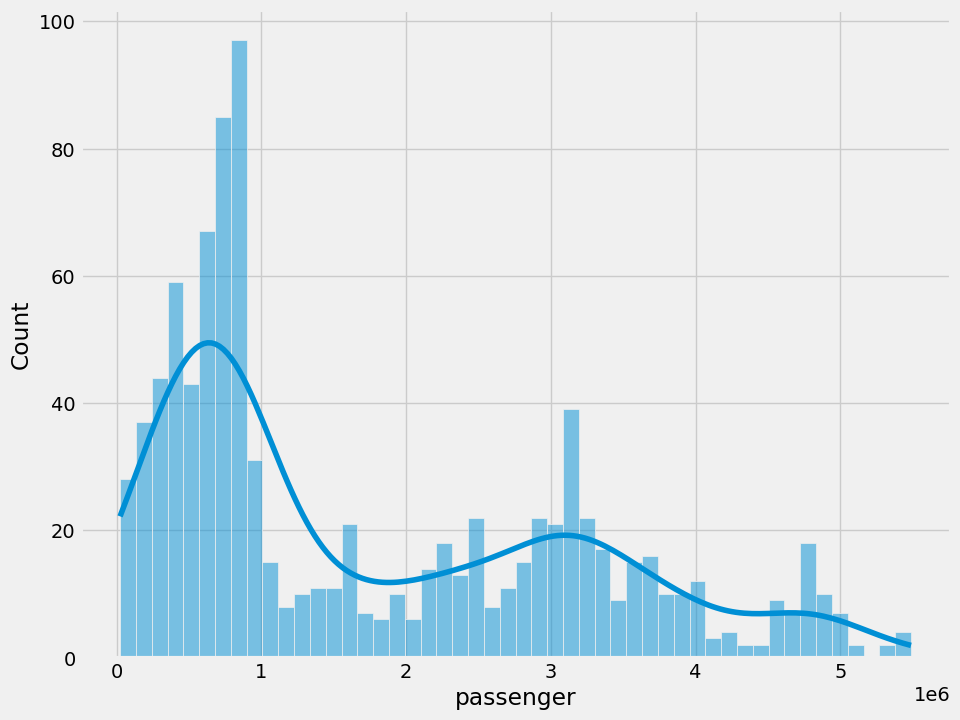

In [77]:
plt.figure(figsize=(10,8))
sns.histplot(data=pass_journey_by_public_transport_df, x='passenger', kde=True, bins=50);

In [78]:
fig_scatter_matrix_public_transport = px.scatter_matrix(pass_journey_by_public_transport_df,
                        width=950, 
                        height=800,
                        color="mode_of_transport"
                       )
fig_scatter_matrix_public_transport.show()

In [79]:
scatter_plot(pass_journey_by_public_transport_df,
             x_axis="week_number",
             y_axis="passenger",
             color="mode_of_transport"
            )

#### Average number  of passenger travell via mode of transport in given year

In [80]:
pass_journey_by_public_transport_grpby_df = pass_journey_by_public_transport_df.groupby(['year','mode_of_transport'], as_index=False)['passenger'].median()

In [81]:
pass_journey_by_public_transport_grpby_df.head()

year                     mode_of_transport  passenger
0  2019  All public transport, excluding LUAS  3655779.5
1  2019           Bus, excluding Dublin Metro   703252.5
2  2019                      Dublin Metro Bus  2953672.5
3  2019                                  Rail        NaN
4  2020  All public transport, excluding LUAS  1982956.0

In [82]:
line_fig_public_transport = px.line(pass_journey_by_public_transport_grpby_df, 
                   y='passenger', 
                   x='year',
                   symbol='mode_of_transport',
                   color='mode_of_transport', 
                   labels=dict(passenger="Number of Passenger", year="Years"),
                   title='Trend of Average Number of Passenger Travelled by Public Transport')
line_fig_public_transport.show()

In [83]:
bar_fig_public_transport = px.bar(pass_journey_by_public_transport_grpby_df, 
                   y='passenger', 
                   x='year',
                   color='mode_of_transport', 
                   barmode='group',
                   text_auto='.3s',
                   labels=dict(passenger="Number of Passenger", year="Years"),
                   title='Average Number of Passenger Travelled by Public Transport')
bar_fig_public_transport.show()

## EDA For datasets Passanger handled by main airports

In [84]:
pass_hand_by_airports_df.head()

STATISTIC Statistic Label  TLIST(M1)         Month C02935V03550  Airport  \
0  TAM08C01      Passengers     201901  2019 January         EIDW   Dublin   
1  TAM08C01      Passengers     201901  2019 January         EICK     Cork   
2  TAM08C01      Passengers     201901  2019 January         EINN  Shannon   
3  TAM08C01      Passengers     201901  2019 January         EIKN    Knock   
4  TAM08C01      Passengers     201901  2019 January         EIKY    Kerry   

     UNIT      VALUE  
0  Number  2054794.0  
1  Number   148939.0  
2  Number    87016.0  
3  Number    42413.0  
4  Number    20829.0

#### Dimension of dataset

In [85]:
pass_hand_by_airports_df.shape

(336, 8)

In [86]:
pass_hand_by_airports_df.isna().sum()

STATISTIC          0
Statistic Label    0
TLIST(M1)          0
Month              0
C02935V03550       0
Airport            0
UNIT               0
VALUE              5
dtype: int64

In [87]:
not_null_mask = pass_hand_by_airports_df.notnull().all(axis=1)
not_null_rows = pass_hand_by_airports_df[not_null_mask]
null_rows = pass_hand_by_airports_df.loc[pass_hand_by_airports_df['Month'].isnull() | pass_hand_by_airports_df['Airport'].isnull() | pass_hand_by_airports_df['VALUE'].isnull()]
null_rows

STATISTIC Statistic Label  TLIST(M1)        Month C02935V03550  \
326  TAM08C01      Passengers     202307    2023 July         EINN   
329  TAM08C01      Passengers     202307    2023 July         EI0M   
332  TAM08C01      Passengers     202308  2023 August         EINN   
334  TAM08C01      Passengers     202308  2023 August         EIKY   
335  TAM08C01      Passengers     202308  2023 August         EI0M   

               Airport    UNIT  VALUE  
326            Shannon  Number    NaN  
329  All main airports  Number    NaN  
332            Shannon  Number    NaN  
334              Kerry  Number    NaN  
335  All main airports  Number    NaN

#### Information about dataset

In [88]:
pass_hand_by_airports_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC        336 non-null    object 
 1   Statistic Label  336 non-null    object 
 2   TLIST(M1)        336 non-null    int64  
 3   Month            336 non-null    object 
 4   C02935V03550     336 non-null    object 
 5   Airport          336 non-null    object 
 6   UNIT             336 non-null    object 
 7   VALUE            331 non-null    float64
dtypes: float64(1), int64(1), object(6)
memory usage: 21.1+ KB


In [89]:
pass_hand_by_airports_df.duplicated().sum()

0

In [90]:
pass_hand_by_airports_df.describe()

TLIST(M1)         VALUE
count     336.000000  3.310000e+02
mean   202091.928571  6.659143e+05
std       135.317584  1.108293e+06
min    201901.000000  0.000000e+00
25%    202002.750000  2.542650e+04
50%    202104.500000  9.221300e+04
75%    202206.250000  4.309540e+05
max    202308.000000  4.040594e+06

#### Extract Year and month from Month column

In [91]:
pass_hand_by_airports_df[['year','month']] = pass_hand_by_airports_df['Month'].str.extract(r'(\d{4}) (\w+)')
pass_hand_by_airports_df.head()

STATISTIC Statistic Label  TLIST(M1)         Month C02935V03550  Airport  \
0  TAM08C01      Passengers     201901  2019 January         EIDW   Dublin   
1  TAM08C01      Passengers     201901  2019 January         EICK     Cork   
2  TAM08C01      Passengers     201901  2019 January         EINN  Shannon   
3  TAM08C01      Passengers     201901  2019 January         EIKN    Knock   
4  TAM08C01      Passengers     201901  2019 January         EIKY    Kerry   

     UNIT      VALUE  year    month  
0  Number  2054794.0  2019  January  
1  Number   148939.0  2019  January  
2  Number    87016.0  2019  January  
3  Number    42413.0  2019  January  
4  Number    20829.0  2019  January

#### Drop column not necessary for analysis

In [92]:
pass_hand_by_airports_df.drop(columns=['STATISTIC','Statistic Label','TLIST(M1)','Month','C02935V03550','UNIT'], axis=1, inplace=True)

#### Rename column name

In [93]:
# inplace = True set the values permenantly so that we can use new columns name
pass_hand_by_airports_df.rename(columns={'Airport':'airport','VALUE':'passenger'}, inplace=True)

#### Boxplot to see outliers in dataset

In [94]:
box_plot(
    data_frame = pass_hand_by_airports_df,
    x_value= 'year',
    y_value='passenger', 
    color_value='airport',
    graph_title="Passanger Handle by Airports",
    xaxis_title="Year",
    yaxis_title="Number of Passanger",
    xtick=[]
)

#### Histogram for distribution of data

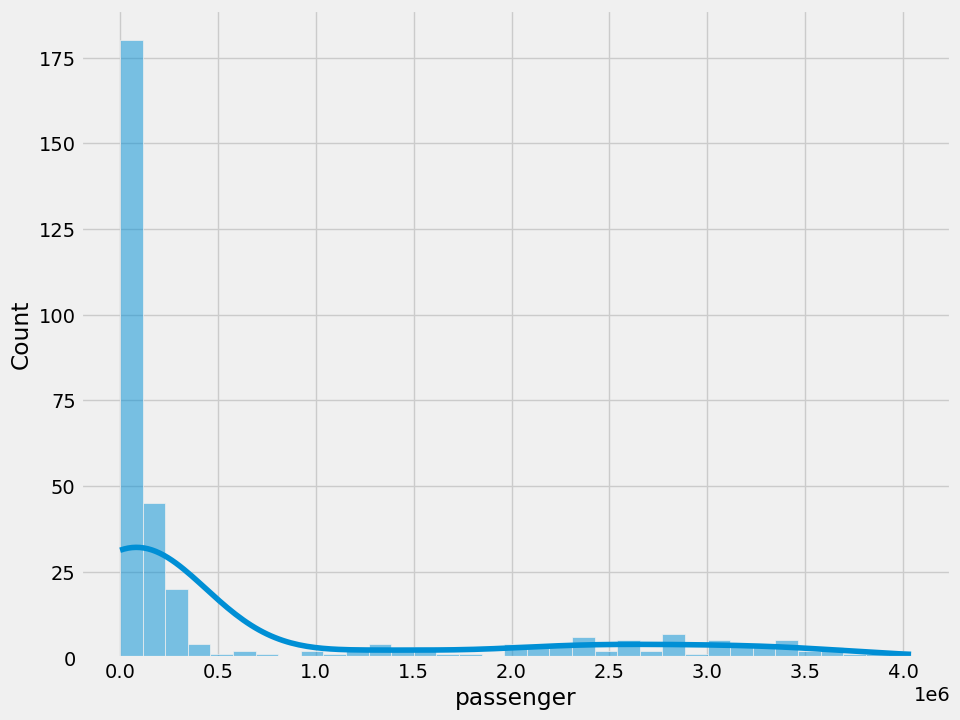

In [95]:
plt.figure(figsize=(10,8))
sns.histplot(data=pass_hand_by_airports_df, x='passenger', kde=True,);

In [96]:
scatter_plot(pass_hand_by_airports_df,
             x_axis="year",
             y_axis="passenger",
             color="airport"
            )

In [97]:
scatter_plot(pass_hand_by_airports_df,
             x_axis="month",
             y_axis="passenger",
             color="airport"
            )

#### Heatmap 

In [98]:
pass_hand_by_airports_exclude_all_df = pass_hand_by_airports_df.query('airport != "All main airports"')

In [99]:
airports = ["Dublin","Cork","Kerry","Knock","Shannon"]
peak_airport_year = pass_hand_by_airports_exclude_all_df.groupby(['airport','year'])['passenger'].sum().unstack().reindex(airports)
peak_airport_year

year           2019       2020       2021        2022        2023
airport                                                          
Dublin   32676251.0  7267240.0  8266271.0  27793345.0  22491935.0
Cork      2585466.0   527014.0   255014.0   2238455.0   1897906.0
Kerry      369836.0    82959.0   115398.0    355043.0    235857.0
Knock      805443.0   142532.0   174027.0    709540.0    555592.0
Shannon   1616422.0   273934.0   322162.0   1421958.0    874916.0

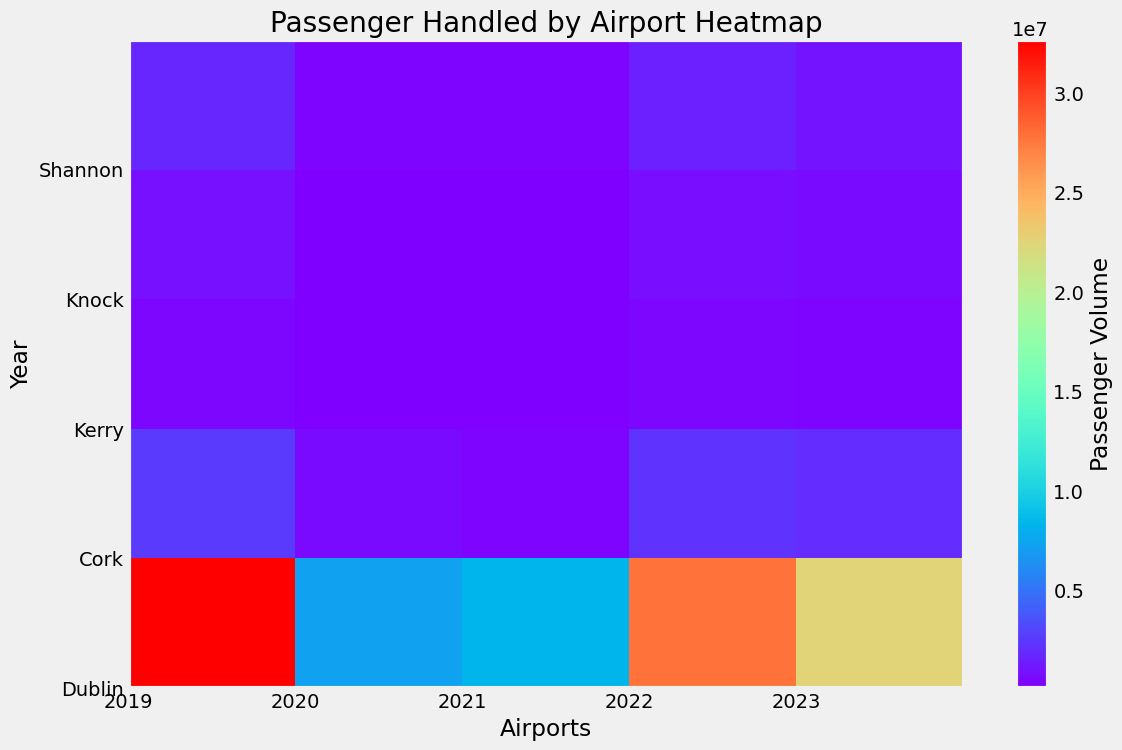

In [100]:
graph_size()
plt.pcolor(peak_airport_year, cmap='rainbow')
plt.colorbar(label='Passenger Volume')
plt.xlabel('Airports')
plt.ylabel('Year')
plt.title('Passenger Handled by Airport Heatmap')
plt.xticks(range(5),labels=peak_airport_year.columns)
plt.yticks(range(5), labels=peak_airport_year.index)
plt.show()

In [101]:
months= ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
peak_airport_month = pass_hand_by_airports_exclude_all_df.groupby(['month','airport',])['passenger'].sum().unstack().reindex(months)
peak_airport_month

airport        Cork      Dublin     Kerry     Knock   Shannon
month                                                        
January    537889.0   7397318.0   72187.0  134763.0  321478.0
February   565357.0   7472158.0   85527.0  167191.0  324564.0
March      564528.0   7844219.0   85826.0  168243.0  352099.0
April      657412.0   8115068.0  107731.0  218437.0  424359.0
May        714543.0   8769102.0  109239.0  208061.0  475233.0
June       826338.0   9620578.0  110374.0  228050.0  533601.0
July       922333.0  10908103.0  138563.0  284164.0  386261.0
August     987306.0  11608585.0  110198.0  327870.0  413522.0
September  521806.0   7494898.0   96622.0  190132.0  372749.0
October    438003.0   7352734.0   98350.0  193091.0  351631.0
November   359647.0   5983838.0   73964.0  138741.0  284934.0
December   408693.0   5928441.0   70512.0  128391.0  268961.0

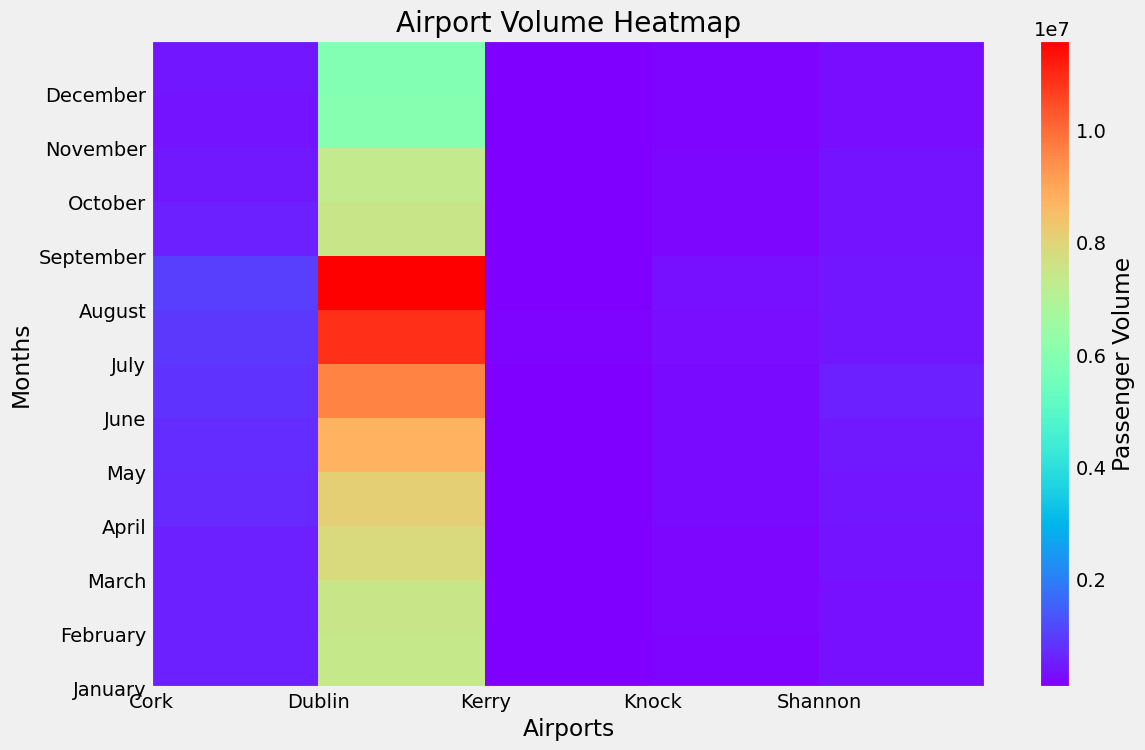

In [102]:
graph_size()
plt.pcolor(peak_airport_month, cmap='rainbow')
plt.colorbar(label='Passenger Volume')
plt.xlabel('Airports')
plt.ylabel('Months')
plt.title('Airport Volume Heatmap')
plt.xticks(range(5),labels=peak_airport_month.columns)
plt.yticks(range(12), labels=peak_airport_month.index)
plt.show()

### Line Graph show trend of passanger handled by Airports

In [103]:
line_fig_airport = px.line(pass_hand_by_airports_df, 
                   x='month', 
                   y='passenger',
                   color='airport',
                   symbol='airport',
                   facet_col='year',
                   labels=dict(passenger="Main Airports in Ireland", month="Months"),
                   title='Trends of Total Passanger Handled By Airports')
line_fig_airport.show()

### Bar graph 

In [104]:
bar_fig_airport = px.bar(pass_hand_by_airports_df, 
                   x='airport', 
                   y='passenger',
                   color='year', 
                   facet_col='year',
                   text_auto='.3s',
                   labels=dict(passenger="Main Airports in Ireland", month="Months"),
                   title='Total Passanger Handled By Airports')
bar_fig_airport.show()

## Dropdown to change Bar and Line chart to view Passanger handle by Busiest Airport of Ireland I.e  Dublin and Cork Airport

In [105]:
fig_airport = px.scatter(
    pass_hand_by_airports_df.query("(airport == 'Dublin') or (airport == 'Cork')").groupby(['year','airport'], as_index=False)['passenger'].sum(),
    x="year",
    y="passenger",
    color="airport")

# Initilizing dash app
airport_insight_lb_app = dash.Dash(__name__)

# Define the Layout of the app
airport_insight_lb_app.layout = html.Div(children=[
    html.H2('Passanger handle by Dublin and Cork Airport'),
    html.P("Select your graph:"),
    
    # Dropdown component
    dcc.Dropdown(
        id='chart_type_dropdown_lb', 
        options=[
            {'label': 'Bar Chart', 'value': 'bar'},
            {'label': 'Line Chart', 'value': 'line'}
        ],
        value='bar'
    ),
    
    # Graph component
    dcc.Graph(id="graph_lb", figure=fig_airport),
])

# callback to update chart based on the dropdown selection
@airport_insight_lb_app.callback(
    Output("graph_lb", "figure"), 
    Input("chart_type_dropdown_lb", "value"))

def update_figure_airport(selected_chart):
    # based on selected dropdown value update the figure
    if selected_chart == 'bar':
        update_figure_airport = px.bar(pass_hand_by_airports_df.query("(airport == 'Dublin') or (airport == 'Cork')"), 
                               x='airport', 
                               y='passenger',
                               color='year', 
                               facet_col='year',
                               labels=dict(passenger="Main Airports in Ireland", month="Months"),
                               title='Total Passanger Handled By Airports')
    elif selected_chart == 'line':
        update_figure_airport = px.line(pass_hand_by_airports_df.query("(airport == 'Dublin') or (airport == 'Cork')").groupby(['year','airport'], as_index=False)['passenger'].sum(),
                                x='year', 
                                y='passenger',
                                color='airport', 
                                symbol='airport',
                                labels=dict(passenger="Main Airports in Ireland", month="Months"),
                                title='Total Passanger Handled By Airports')
    else:
        update_figure_airport = fig_airport # default figure
        
    return update_figure_airport

# Run the app
if __name__ == '__main__':
    airport_insight_lb_app.run_server(port = 8050, debug=True, mode='inline', dev_tools_ui=False)

## EDA for Transport Infrastructure i.e National Route Length

In [106]:
national_route_length_df.head()

STATISTIC        STATISTIC Label  TLIST(A1)  Year C03424V04122  \
0     NRA03  National Route Length       2015  2015            -   
1     NRA03  National Route Length       2015  2015            -   
2     NRA03  National Route Length       2015  2015            -   
3     NRA03  National Route Length       2015  2015            -   
4     NRA03  National Route Length       2015  2015            -   

             Local Authority C03122V03774 Type of Carriageway    UNIT VALUE  
0  All licensing authorities            -   All Carriage ways  Number  5306  
1  All licensing authorities           01            Motorway  Number   916  
2  All licensing authorities           03              Single  Number  4096  
3  All licensing authorities           04        Two plus one  Number   NaN  
4  All licensing authorities           05    Dual carriageway  Number   294

In [107]:
# national_route_length_df['VALUE'].unique()

#### type of some missing value

In [108]:
# missing_values = ['n.a.','?','NA','n/a','na','--','nan','.','-']
# national_route_length_df = pd.read_csv(r"./datasets/national_road_length_2015_22.csv", na_values=missing_values)

In [109]:
national_route_length_df.head()

STATISTIC        STATISTIC Label  TLIST(A1)  Year C03424V04122  \
0     NRA03  National Route Length       2015  2015            -   
1     NRA03  National Route Length       2015  2015            -   
2     NRA03  National Route Length       2015  2015            -   
3     NRA03  National Route Length       2015  2015            -   
4     NRA03  National Route Length       2015  2015            -   

             Local Authority C03122V03774 Type of Carriageway    UNIT VALUE  
0  All licensing authorities            -   All Carriage ways  Number  5306  
1  All licensing authorities           01            Motorway  Number   916  
2  All licensing authorities           03              Single  Number  4096  
3  All licensing authorities           04        Two plus one  Number   NaN  
4  All licensing authorities           05    Dual carriageway  Number   294

### Dimension of dataset

In [110]:
national_route_length_df.shape

(1080, 10)

#### Check for Is dataset has null value

In [111]:
national_route_length_df.isna().sum()

STATISTIC                0
STATISTIC Label          0
TLIST(A1)                0
Year                     0
C03424V04122             0
Local Authority          0
C03122V03774             0
Type of Carriageway      0
UNIT                     0
VALUE                  232
dtype: int64

In [112]:
not_null_mask = national_route_length_df.notnull().all(axis=1)
not_null_rows = national_route_length_df[not_null_mask]
null_rows = national_route_length_df.loc[national_route_length_df['VALUE'].isnull()]
null_rows

STATISTIC        STATISTIC Label  TLIST(A1)  Year C03424V04122  \
3       NRA03  National Route Length       2015  2015            -   
8       NRA03  National Route Length       2015  2015           01   
13      NRA03  National Route Length       2015  2015           02   
18      NRA03  National Route Length       2015  2015           03   
23      NRA03  National Route Length       2015  2015           04   
..        ...                    ...        ...   ...          ...   
923     NRA03  National Route Length       2021  2021           22   
928     NRA03  National Route Length       2021  2021           23   
933     NRA03  National Route Length       2021  2021           24   
938     NRA03  National Route Length       2021  2021           25   
943     NRA03  National Route Length       2021  2021           26   

               Local Authority C03122V03774 Type of Carriageway    UNIT VALUE  
3    All licensing authorities           04        Two plus one  Number   NaN  
8                       Carlow           04        Two plus one  Number   NaN  
13                      Dublin           04        Two plus one  Number   NaN  
18                     Kildare           04        Two plus one  Number   NaN  
23                    Kilkenny           04        Two plus one  Number   NaN  
..                         ...          ...                 ...     ...   ...  
923                  Roscommon           04        Two plus one  Number   NaN  
928                      Sligo           04        Two plus one  Number   NaN  
933                      Cavan           04        Two plus one  Number   NaN  
938                    Donegal           04        Two plus one  Number   NaN  
943                   Monaghan           04        Two plus one  Number   NaN  

[232 rows x 10 columns]

In [113]:
national_route_length_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   STATISTIC            1080 non-null   object
 1   STATISTIC Label      1080 non-null   object
 2   TLIST(A1)            1080 non-null   int64 
 3   Year                 1080 non-null   int64 
 4   C03424V04122         1080 non-null   object
 5   Local Authority      1080 non-null   object
 6   C03122V03774         1080 non-null   object
 7   Type of Carriageway  1080 non-null   object
 8   UNIT                 1080 non-null   object
 9   VALUE                848 non-null    object
dtypes: int64(2), object(8)
memory usage: 84.5+ KB


#### Type conversion from object to numeric

In [114]:
national_route_length_df['VALUE'] = pd.to_numeric(national_route_length_df['VALUE'], errors='coerce')

In [115]:
# national_route_length_df['VALUE'].unique()

#### Drop Null row

In [116]:
national_route_length_df.dropna(axis=0, inplace=True)
national_route_length_df.isna().sum()

STATISTIC              0
STATISTIC Label        0
TLIST(A1)              0
Year                   0
C03424V04122           0
Local Authority        0
C03122V03774           0
Type of Carriageway    0
UNIT                   0
VALUE                  0
dtype: int64

In [117]:
national_route_length_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 807 entries, 0 to 1079
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   STATISTIC            807 non-null    object 
 1   STATISTIC Label      807 non-null    object 
 2   TLIST(A1)            807 non-null    int64  
 3   Year                 807 non-null    int64  
 4   C03424V04122         807 non-null    object 
 5   Local Authority      807 non-null    object 
 6   C03122V03774         807 non-null    object 
 7   Type of Carriageway  807 non-null    object 
 8   UNIT                 807 non-null    object 
 9   VALUE                807 non-null    float64
dtypes: float64(1), int64(2), object(7)
memory usage: 69.4+ KB


#### Drop column not necessary for analysis

In [118]:
national_route_length_df.drop(columns=['STATISTIC','STATISTIC Label','TLIST(A1)','C03424V04122','C03122V03774','UNIT'], inplace=True)

In [119]:
national_route_length_df.head()

Year            Local Authority Type of Carriageway   VALUE
0  2015  All licensing authorities   All Carriage ways  5306.0
1  2015  All licensing authorities            Motorway   916.0
2  2015  All licensing authorities              Single  4096.0
4  2015  All licensing authorities    Dual carriageway   294.0
5  2015                     Carlow   All Carriage ways    78.0

### Rename column name

In [120]:
national_route_length_df.rename(columns={'Year':'year','Local Authority':'local_authority','Type of Carriageway':'type_of_carriageway','VALUE':'road_in_km'}, inplace=True)

#### Unique value in each column

In [121]:
#year
national_route_length_df['year'].unique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

In [122]:
#Local Authority
national_route_length_df['local_authority'].unique()

array(['All licensing authorities', 'Carlow', 'Dublin', 'Kildare',
       'Kilkenny', 'Laois', 'Longford', 'Louth', 'Meath', 'Offaly',
       'Westmeath', 'Wexford', 'Wicklow', 'Clare', 'Cork', 'Kerry',
       'Limerick', 'Tipperary', 'Waterford', 'Galway', 'Leitrim', 'Mayo',
       'Roscommon', 'Sligo', 'Cavan', 'Donegal', 'Monaghan'], dtype=object)

#### drop rows contain null/or any symbol

In [123]:
# national_route_length_df = national_route_length_df[national_route_length_df['road_in_km'] != '.'].reset_index(drop=True)
# national_route_length_df = national_route_length_df[national_route_length_df['road_in_km'] != '-'].reset_index(drop=True)

In [124]:
#Local Authority
national_route_length_df['type_of_carriageway'].unique()

array(['All Carriage ways', 'Motorway', 'Single', 'Dual carriageway'],
      dtype=object)

In [125]:
#road_in_km
# national_route_length_df['road_in_km'].unique()

In [126]:
national_route_length_df.head()

year            local_authority type_of_carriageway  road_in_km
0  2015  All licensing authorities   All Carriage ways      5306.0
1  2015  All licensing authorities            Motorway       916.0
2  2015  All licensing authorities              Single      4096.0
4  2015  All licensing authorities    Dual carriageway       294.0
5  2015                     Carlow   All Carriage ways        78.0

#### Box plot

In [127]:
fig_national_route = px.box(national_route_length_df, 
             y="road_in_km",
             title="National Route Length",
             x="type_of_carriageway"
             ).update_layout(xaxis_title="Type of Carriageway", yaxis_title="Roads in KMs")
fig_national_route.show()


#### Remove Outliers

In [128]:
#1st degree removal of outliers
no_outliers_national_route_length_df = remove_outliers(national_route_length_df, 'road_in_km')

#2nd degree removal of outliers
no_outliers_national_route_length_df = remove_outliers(no_outliers_national_route_length_df, 'road_in_km')

IQR 148.0
lower_limit -204.0
upper_limit 388.0
IQR 107.0
lower_limit -144.5
upper_limit 283.5


In [129]:
fig_national_route = px.box(no_outliers_national_route_length_df, 
             y="road_in_km",
             title="National Route Length",
             x="type_of_carriageway"
             ).update_layout(xaxis_title="Type of Carriageway", yaxis_title="Roads in KMs")
fig_national_route.show()


#### Distribution of data 

In [130]:
# from dash import Dash, dcc, html, Input, Output
# import plotly.express as px

import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

fig_national_route = px.histogram(no_outliers_national_route_length_df, x="road_in_km")  # default to scatter plot

# Initilizing dash app
app_histogram_national_route = dash.Dash(__name__)

# Define the Layout of the app
app_histogram_national_route.layout = html.Div(children=[
    html.H2('Histogram for Features'),
    html.P("Select your feature:"),
    
    # Dropdown component
    dcc.Dropdown(
        id='histogram_column_dropdown_national_route', 
        options=[
            {'label': 'Year', 'value': 'year'},
            {'label': 'Type of Carriageway', 'value': 'type_of_carriageway'}
        ],
        value=''
    ),
    
    # Graph component
    dcc.Graph(id="graph_histogram_national_route", figure = fig_national_route),
])

# callback to update chart based on the dropdown selection
@app_histogram_national_route.callback(
    Output("graph_histogram_national_route", "figure"), 
    Input("histogram_column_dropdown_national_route", "value"))

def update_figure_histogram(selected_chart):
    # based on selected dropdown value update the figure
    if selected_chart == 'year':
        update_figure_histogram = px.histogram(no_outliers_national_route_length_df, x="road_in_km", color='year').update_layout(xaxis_title="Roads in KMs", yaxis_title="Count")
    elif selected_chart == 'type_of_carriageway':
        update_figure_histogram = px.histogram(no_outliers_national_route_length_df, x="road_in_km", color='type_of_carriageway').update_layout(xaxis_title="Roads in KMs", yaxis_title="Count")
    else:
        update_figure_histogram = fig_national_route
    return update_figure_histogram

# Run the app
if __name__ == '__main__':
    app_histogram_national_route.run_server(port = 8051, debug=True, mode='inline', dev_tools_ui=False)

In [131]:
no_outliers_national_route_length_df.head()

year local_authority type_of_carriageway  road_in_km
5   2015          Carlow   All Carriage ways        78.0
6   2015          Carlow            Motorway        24.0
7   2015          Carlow              Single        54.0
9   2015          Carlow    Dual carriageway         0.0
10  2015          Dublin   All Carriage ways       140.0

In [132]:
no_outliers_national_route_length_df['local_authority'].unique()

array(['Carlow', 'Dublin', 'Kildare', 'Kilkenny', 'Laois', 'Longford',
       'Louth', 'Meath', 'Offaly', 'Westmeath', 'Wexford', 'Wicklow',
       'Clare', 'Cork', 'Kerry', 'Limerick', 'Tipperary', 'Waterford',
       'Galway', 'Leitrim', 'Mayo', 'Roscommon', 'Sligo', 'Cavan',
       'Donegal', 'Monaghan'], dtype=object)

In [133]:
fig_national_route_bar = px.bar(no_outliers_national_route_length_df.groupby(['local_authority'], as_index=False)['road_in_km'].sum(), 
              x="road_in_km", 
              barmode='group', 
              y="local_authority", 
#               color="type_of_carriageway",
              orientation='h',
              height=900,
              text_auto='.3s',
             
             ).update_layout(xaxis_title="Roads in KMs", yaxis_title="Local Authority")
fig_national_route_bar.show()

In [134]:
fig_national_route_bar_carriageway = px.bar(no_outliers_national_route_length_df.groupby(['local_authority','type_of_carriageway'], as_index=False)['road_in_km'].sum(), 
              y="road_in_km", 
              barmode='group', 
              x="local_authority", 
              color="type_of_carriageway",
#               orientation='h',
#               height=900,
             
             ).update_layout(yaxis_title="Roads in KMs", xaxis_title="Local Authority")
fig_national_route_bar_carriageway.show()

In [135]:
fig_national_route_line_carriageway = px.line(no_outliers_national_route_length_df.groupby(['year','type_of_carriageway'], as_index=False)['road_in_km'].sum(), 
              y="road_in_km", 
              symbol='type_of_carriageway',
              x="year", 
              color="type_of_carriageway",
             ).update_layout(yaxis_title="Roads in KMs", xaxis_title="Year")
fig_national_route_line_carriageway.show()

## EDA for Rail Dataset of Ireland And Paris

In [136]:
traffic_annual_entrance_2013_df.head()


Rang Réseau         Station    Trafic Correspondance_1 Correspondance_2  \
0    12  Métro           OPERA  12269711                3                7   
1    13  Métro  HOTEL DE VILLE  11953352                1               11   
2    19  Métro          NATION   9541406                1                2   
3    25  Métro    SAINT-MICHEL   8797595                4              NaN   
4    20  Métro    PALAIS-ROYAL   9385220                1                7   

  Correspondance_3  Correspondance_4  Correspondance_5  Ville  \
0                8               NaN               NaN  Paris   
1              NaN               NaN               NaN  Paris   
2                6               9.0               NaN  Paris   
3              NaN               NaN               NaN  Paris   
4              NaN               NaN               NaN  Paris   

   Arrondissement pour Paris  
0                        9.0  
1                        4.0  
2                       12.0  
3                        5.0  
4                        1.0

### Function to add  'year' column 

In [137]:
dataframes = [traffic_annual_entrance_2013_df,traffic_annual_entrance_2014_df,
              traffic_annual_entrance_2015_df,traffic_annual_entrance_2016_df,
              traffic_annual_entrance_2017_df,traffic_annual_entrance_2018_df,
              traffic_annual_entrance_2019_df,traffic_annual_entrance_2020_df,
              traffic_annual_entrance_2021_df]

def add_year_col():
    try:
        # Iterate through the list of Dataframes and add the column 'year'
        for year, dataframe in enumerate(dataframes, start=2013):
            dataframe['year'] = year
    except:
        print("Please check for correct dataframe")
          
add_year_col()

In [138]:
traffic_annual_entrance_2021_df.head()

Rang Réseau                 Station    Trafic Correspondance_1  \
0     7  Métro              REPUBLIQUE  11079708                3   
1     9  Métro              LA DEFENSE   9256802                1   
2    13  Métro          HOTEL DE VILLE   7251729                1   
3    30  Métro  VILLEJUIF-LOUIS ARAGON   5218070                7   
4    40  Métro            PALAIS-ROYAL   4822599                1   

  Correspondance_2 Correspondance_3  Correspondance_4  Correspondance_5  \
0                5                8               9.0              11.0   
1              NaN              NaN               NaN               NaN   
2               11              NaN               NaN               NaN   
3              NaN              NaN               NaN               NaN   
4                7              NaN               NaN               NaN   

       Ville  Arrondissement pour Paris  year  
0      Paris                       11.0  2021  
1    Puteaux                        NaN  2021  
2      Paris                        4.0  2021  
3  Villejuif                        NaN  2021  
4      Paris                        1.0  2021

#### Concatining dataset

In [139]:
passenger_journey_by_rail_paris_df = pd.concat([traffic_annual_entrance_2013_df,traffic_annual_entrance_2014_df,traffic_annual_entrance_2015_df,traffic_annual_entrance_2016_df,traffic_annual_entrance_2017_df,traffic_annual_entrance_2018_df,traffic_annual_entrance_2019_df,traffic_annual_entrance_2020_df,traffic_annual_entrance_2021_df],ignore_index=True)
passenger_journey_by_rail_paris_df.sample(5)

Rang Réseau              Station   Trafic Correspondance_1  \
2652    26    RER    JOINVILLE-LE-PONT  2314407                A   
2466   303  Métro     EGLISE D'AUTEUIL   169939               10   
224     51  Métro  MAIRIE DE MONTREUIL  6328612                9   
2143   129  Métro              DUPLEIX  4092602                6   
1359   167  Métro            CAMBRONNE  3140382                6   

     Correspondance_2 Correspondance_3  Correspondance_4  Correspondance_5  \
2652              NaN              NaN               NaN               NaN   
2466              NaN              NaN               NaN               NaN   
224               NaN              NaN               NaN               NaN   
2143              NaN              NaN               NaN               NaN   
1359              NaN              NaN               NaN               NaN   

                  Ville  Arrondissement pour Paris  year  Column 12  \
2652  Joinville-le-Pont                        NaN  2020        NaN   
2466              Paris                       16.0  2019        NaN   
224           Montreuil                        NaN  2013        NaN   
2143              Paris                       15.0  2018        NaN   
1359              Paris                       15.0  2016        NaN   

      Column 13  Column 14  Column 15  
2652        NaN        NaN        NaN  
2466        NaN        NaN        NaN  
224         NaN        NaN        NaN  
2143        NaN        NaN        NaN  
1359        NaN        NaN        NaN

#### Drop column not required for analysis

In [140]:
passenger_journey_by_rail_paris_df.drop(columns=['Rang','Correspondance_1','Correspondance_2','Correspondance_3','Correspondance_4','Correspondance_5','Arrondissement pour Paris','Column 12','Column 13','Column 14','Column 15'], inplace=True)

#### Rename column

In [141]:
# inplace = True set the values permenantly so that we can use new columns name
new_column_name = ['type_of_journey','station','passenger','city','year']
col_dict = columns_dict(passenger_journey_by_rail_paris_df, new_column_name)
passenger_journey_by_rail_paris_df.rename(columns=col_dict, inplace=True)

In [142]:
passenger_journey_by_rail_paris_df.shape

(3325, 5)

In [143]:
passenger_journey_by_rail_paris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3325 entries, 0 to 3324
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   type_of_journey  3325 non-null   object
 1   station          3325 non-null   object
 2   passenger        3325 non-null   int64 
 3   city             3325 non-null   object
 4   year             3325 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 130.0+ KB


#### Check if there any null value in data

In [144]:
passenger_journey_by_rail_paris_df.isna().sum()

type_of_journey    0
station            0
passenger          0
city               0
year               0
dtype: int64

#### Check is there any duplicated value 

In [145]:
passenger_journey_by_rail_paris_df.duplicated().sum()

0

#### unique() to check unique value present in particular column

In [146]:
passenger_journey_by_rail_paris_df['type_of_journey'].unique()

array(['Métro', 'RER'], dtype=object)

In [147]:
passenger_journey_by_rail_paris_df['station'].unique()

array(['OPERA', 'HOTEL DE VILLE', 'NATION', 'SAINT-MICHEL',
       'PALAIS-ROYAL', 'CRIMEE', 'GRANDS BOULEVARDS', 'PONT DE NEUILLY',
       'MAIRIE DE CLICHY', 'SEVRES-BABYLONE', 'SAINT-GERMAIN DES PRES',
       'REAUMUR-SEBASTOPOL', 'ANATOLE FRANCE', 'MAIRIE DE SAINT-OUEN',
       'CADET', 'CAMBRONNE', 'GAITE', 'SAINT-MAUR', 'MARAICHERS',
       'PORTE DE LA CHAPELLE', 'BILLANCOURT', 'BERAULT',
       'JAVEL-ANDRE CITROEN', "PORTE D'ITALIE", 'MAISONS-ALFORT-STADE',
       'LOURMEL', 'NATION-RER', "CRETEIL-L'ECHAT", 'VARENNE', 'EXELMANS',
       'SCEAUX', 'PHILIPPE AUGUSTE', 'CHEVALERET', 'SAINT-GEORGES',
       'FELIX FAURE', 'SAINT-FARGEAU', 'BUTTES-CHAUMONT',
       'CHATELET-LES HALLES-RER', 'OBERKAMPF', 'LUXEMBOURG',
       'EGLISE DE PANTIN', 'MARNE-LA-VALLEE-CHESSY', 'SEVRES-LECOURBE',
       'ASSEMBLEE NATIONALE', 'CHATELET', 'LOGNES', 'MIROMESNIL',
       'GAMBETTA', 'VOLTAIRE', 'ANVERS', 'HOCHE', 'CARREFOUR PLEYEL',
       'GLACIERE', 'NATIONALE', 'COLONEL FABIEN', 'COURCELLE

In [148]:
passenger_journey_by_rail_paris_df['city'].unique()

array(['Paris', 'Neuilly Sur Seine', 'Clichy', 'Levallois-Perret',
       'Saint Ouen', 'Boulogne Billancourt', 'Vincennes',
       'Maisons -Alfort', 'Créteil', 'sceaux', 'Pantin', 'Montévrain',
       'Lognes', 'Saint Denis', 'Malakoff', 'Fontenay-sous-Bois',
       'Fontenay aux roses', 'Puteaux', 'Chatillon', 'Antony',
       'Gif sur Yvette', 'Aubervilliers', 'Sceaux', 'Le Vésinet',
       'Charenton', 'Arcueil', 'La Courneuve', 'Bourg la Reine',
       'Joinville-le-Pont', 'Orsay', 'Massy', 'Bussy-Saint-Georges',
       'Palaiseau', 'Saint-Germain-en-Laye',
       'Saint Denis / Aubervilliers', 'Nanterre', 'Villejuif',
       'Saint-Maur des Fossés', 'Torcy', 'Montreuil', 'Bagnolet',
       'Issy Les Moulineaux', 'Asnières sur Seine', 'Boissy-Saint-Léger',
       'Sucy-en-Brie', 'Kremlin-Bicêtre', 'Nogent-sur-Marne',
       'Noisy-le-Grand', 'Gentilly', 'Saint Mandé', 'Cachan', 'Bobigny',
       'Ivry', 'Montrouge', 'Chatou', 'Bures sur Yvette',
       'Neuilly-sur-Seine', 'Noisi

In [149]:
passenger_journey_by_rail_paris_df.replace(to_replace={'é':'e','è':'e','ê':'e'}, regex=True, inplace=True)

In [150]:
passenger_journey_by_rail_paris_df.head()

type_of_journey         station  passenger   city  year
0           Metro           OPERA   12269711  Paris  2013
1           Metro  HOTEL DE VILLE   11953352  Paris  2013
2           Metro          NATION    9541406  Paris  2013
3           Metro    SAINT-MICHEL    8797595  Paris  2013
4           Metro    PALAIS-ROYAL    9385220  Paris  2013

In [151]:
passenger_journey_by_rail_paris_df['year'].unique()

array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

# 6. Statistical Analysis

## 6.1. Descriptive statistics

### 6.1.1. Central Tendency of Paris Rail Dataset

#### describe()

In [152]:
# provide statistical summary for the column containing integer data
passenger_journey_by_rail_paris_df.describe()

passenger         year
count  3.325000e+03  3325.000000
mean   4.417983e+06  2017.004211
std    5.600199e+06     2.583733
min    7.580900e+04  2013.000000
25%    1.935004e+06  2015.000000
50%    3.043606e+06  2017.000000
75%    4.882748e+06  2019.000000
max    5.131619e+07  2021.000000

#### 6.1.1.1. Mean of Passanger

In [153]:
average_of_passenger_journey = stat.mean(passenger_journey_by_rail_paris_df['passenger'])
print('Average Passenger Journey By Rail',average_of_passenger_journey)

Average Passenger Journey By Rail 4417983.349172932


#### 6.1.1.2 Median of Passanger

In [154]:
median_of_passanger_journey_by_rail = stat.median(passenger_journey_by_rail_paris_df['passenger'])
print('50% Percentile of Passenger Journey by Rail (i.e Median: )', median_of_passanger_journey_by_rail)

50% Percentile of Passenger Journey by Rail (i.e Median: ) 3043606


#### 6.1.1.3 Mode of Passanger

In [155]:
highest_frequency_of_passanger = stat.mode(passenger_journey_by_rail_paris_df['passenger'])
print('Highest Occurance of Passenger (i.e Mode: )', highest_frequency_of_passanger)

Highest Occurance of Passenger (i.e Mode: ) 394292


#### describe(include=object)

In [156]:
# provide statistical summary for the column containing object i.e string data
passenger_journey_by_rail_paris_df.describe(include=object)

type_of_journey station   city
count             3325    3325   3325
unique               2     372     67
top              Metro   OPERA  Paris
freq              2731       9   2297

### From above pandas `describe()` method and `statistics as stat ` we get similar value

    - Count: It says there are '3325' observation of passenger travel by rails (i.e Metro and RER) in paris.
    
    - Mean: '4417983.349172932', It is the average number of passenger travel by rails in paris in given year                    2013-2021.
    
    - Min: '75809' is a minimum number of passanger travel in a given year
    
    - Median: Also known as 50% i.e Middle value is '3043606' this shows that Median value is lower then Mean.                  So given passanger is Skewed toward Right (Right/Positively Skewed Data) 
    
    - Mode: '394292' is a highest frequency of passenger
    
    - Max: '5131619' is a Maximum number of passenger travel via rail in paris city.
    
    - Unique: It shows there are 2 unique type of journey i.e Metro and RER, 372 stations and 67 unique city                 respectively.
    
    -Top: Metro is top preference of the passenger, OPERA stations with Paris City.
    
    -Freq: 2731 is the highest occurance for selecting Metro and 9 time OPERA stations, where 2297 times                  occurance for Paris city
    
    

### 6.1.2. Dispersion of Paris Rail Dataset

#### 6.1.2.1. Box plot to see outilers

In [157]:
fig_box_paris_rail = px.box(passenger_journey_by_rail_paris_df, 
             y="passenger",
             title="Passenger journey by Metro and RER",
             x="type_of_journey",
             color="type_of_journey"
             ).update_layout(xaxis_title="Journey By", yaxis_title="Passenger")
fig_box_paris_rail.show()

 ### Box plot measure how far data is spread
 <br>
 Metro:
 
    - Max: 51.31619M
    - Upper fence: 9.08205M
    - 3rd Quartile(Q3): 4.863457M
    - Median/ 2nd Quartile(Q2): 3.081186M
    - 1st Quartile(Q1): 2.021739M
    - Lower fence: 75.809K
    - Min: 75.809K 
    
    
<br>
RER:

    - Max: 48.20512M
    - Upper fence: 10.09643M
    - 3rd Quartile(Q3): 5.014436M
    - Median/ 2nd Quartile(Q2): 2.787897M
    - 1st Quartile(Q1): 1.521999M
    - Lower fence: 213.256k
    - Min: 213.256K 
   
 From the above data it shows that both type of journey has outlier which leads to the skewness in data. Most of the data lies above the Upper fench in both case
    

#### 6.1.2.2. Range 

In [158]:
range_of_data_spread = max(passenger_journey_by_rail_paris_df['passenger']) - min(passenger_journey_by_rail_paris_df['passenger'])
print("Range of Spread of Data:", range_of_data_spread)

Range of Spread of Data: 51240385


#### 6.1.2.3. Standard Deviation 

In [159]:
sd = stat.stdev(passenger_journey_by_rail_paris_df['passenger'])
print("Standard Deviation", sd)

Standard Deviation 5600198.934991727


###  `Mean: ` 4417983.349172932 and `Standard Deviation:` 5600198.934991727 
 
     - It indicates that there is a wide range of passenger travell and it can be vary significantly from               average. Here it shows that people higly travel travel in  Metro as compare to RER, contributing to the         overall dataset.

#### 6.1.2.4. Variance of Passenger

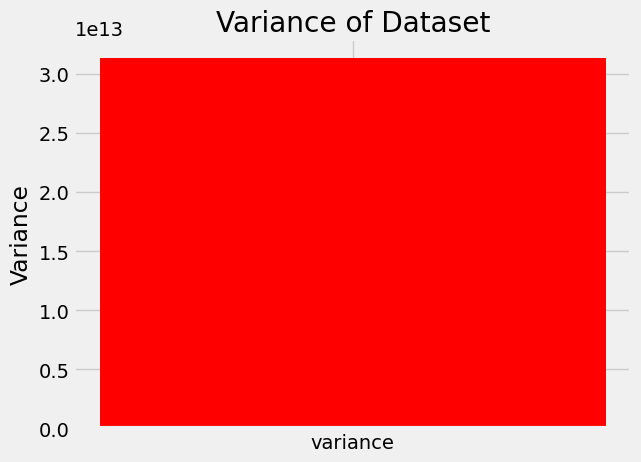

In [160]:
variance = stat.variance(passenger_journey_by_rail_paris_df['passenger'])
plt.bar(['variance'],[variance], color='red')
plt.title('Variance of Dataset')
plt.ylabel('Variance')
plt.show()

### 6.1.3. Shape of Paris Rail Dataset

#### Histplot to see the distribution of data

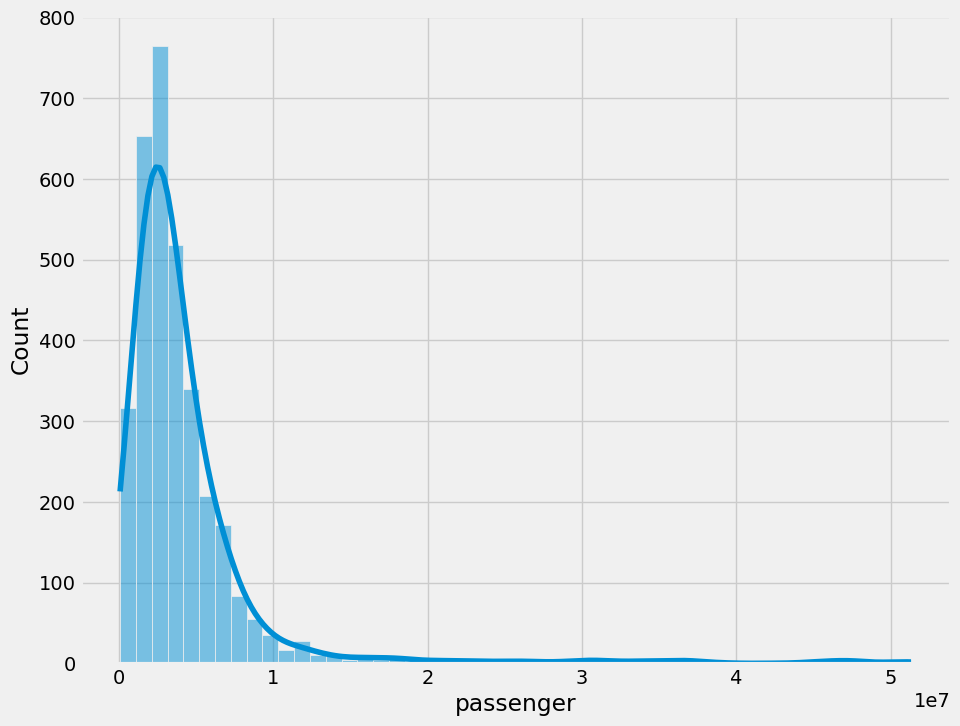

In [161]:
plt.figure(figsize=(10,8))
sns.histplot(data=passenger_journey_by_rail_paris_df, x='passenger', kde=True, bins=50);

#### It show data is tightly distributed to the right and loose distributed to the left. Hence, It is `Right Skewed or Positively Skewed` 


### 6.1.3.1 Skewness of data

In [162]:
passenger_skew_value = stats.skew(passenger_journey_by_rail_paris_df['passenger'], axis=0, bias=True)
print('Skew Value',passenger_skew_value)
print("From above skew is show data is positively skewed")

Skew Value 4.895878565621718
From above skew is show data is positively skewed


### 6.1.3.2 Kurtosis of data

In [163]:
kurtosis_value = stats.kurtosis(passenger_journey_by_rail_paris_df['passenger'], axis=0, bias=True)
print('kurtosis Value',kurtosis_value)

if kurtosis_value > 0:
    print('Leptokurtic i.e Data is Heavy Tails')
elif kurtosis_value < 0:
    print('Platykurtic i.e Data is Light Tails')
else:
    print('Mesokurtic i.e Data is Normally Distributed')

kurtosis Value 29.486611056166076
Leptokurtic i.e Data is Heavy Tails


#### Remove outlier by IQR method

In [164]:
no_outliers_passenger_journey_by_rail_paris_df = remove_outliers(passenger_journey_by_rail_paris_df, 'passenger')
no_outliers_passenger_journey_by_rail_paris_df = remove_outliers(no_outliers_passenger_journey_by_rail_paris_df, 'passenger')

IQR 2947744.0
lower_limit -2486612.0
upper_limit 9304364.0
IQR 2538573.0
lower_limit -1943843.5
upper_limit 8210448.5


In [165]:
fig_box_paris_rail = px.box(no_outliers_passenger_journey_by_rail_paris_df, 
             y="passenger",
             title="Passenger journey by Metro and RER",
             x="type_of_journey",
             color="type_of_journey"
             ).update_layout(xaxis_title="Journey By", yaxis_title="Passenger")
fig_box_paris_rail.show()

#### Histoplo after reoving outliers

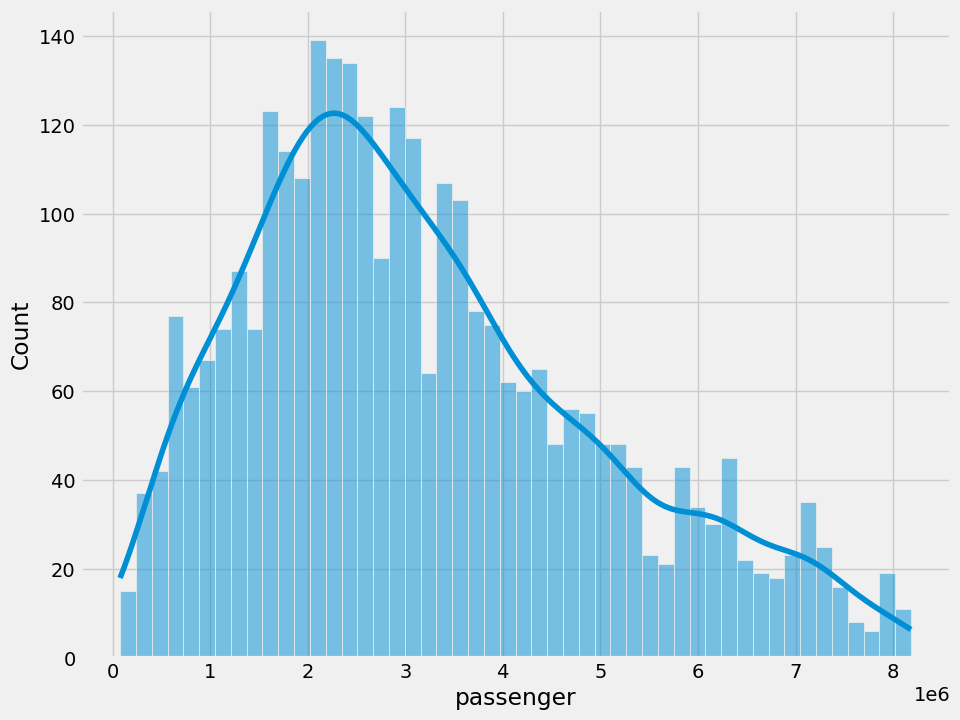

In [166]:
plt.figure(figsize=(10,8))
sns.histplot(data=no_outliers_passenger_journey_by_rail_paris_df, x='passenger', kde=True, bins=50);

In [167]:

fig_histogram_paris_rail = px.histogram(no_outliers_passenger_journey_by_rail_paris_df, x="passenger", color='type_of_journey').update_layout(xaxis_title="Journey By", yaxis_title="Passenger")
fig_histogram_paris_rail.show()

### 6.1.3.3 Skew and Kurtosis of data after Removing Outliers by IQR method

In [168]:
passenger_skew_value = stats.skew(no_outliers_passenger_journey_by_rail_paris_df['passenger'], axis=0, bias=True)
print('Skew Value',passenger_skew_value)
print("From above skew is show data is Symmetrical Distributed")

kurtosis_value = stats.kurtosis(no_outliers_passenger_journey_by_rail_paris_df['passenger'], axis=0, bias=True)
print('kurtosis Value',kurtosis_value)

if kurtosis_value > 0:
    print('Leptokurtic i.e Data is Heavy Tails')
elif kurtosis_value < 0:
    print('Platykurtic i.e Data is Light Tails')
else:
    print('Mesokurtic i.e Data is Normally Distributed')

Skew Value 0.6621652620264507
From above skew is show data is Symmetrical Distributed
kurtosis Value -0.20993603563693686
Platykurtic i.e Data is Light Tails


In [169]:
no_outliers_passenger_journey_by_rail_paris_df.describe()

passenger         year
count  3.050000e+03  3050.000000
mean   3.183932e+06  2017.057377
std    1.799870e+06     2.596195
min    7.580900e+04  2013.000000
25%    1.843509e+06  2015.000000
50%    2.860375e+06  2017.000000
75%    4.285298e+06  2019.000000
max    8.182788e+06  2021.000000

In [170]:
no_outliers_passenger_journey_by_rail_paris_df.shape

(3050, 5)

### 6.1.4.1. Scatter plot and Correlation

In [171]:
fig_paris_rail_scatter = px.scatter_matrix(no_outliers_passenger_journey_by_rail_paris_df,   
                                        width=950, 
                                        height=800,
                                        color="year")  # default to scatter plot

# Initilizing dash app
app_paris_rail_scatter = dash.Dash(__name__)

# Define the Layout of the app
app_paris_rail_scatter.layout = html.Div(children=[
    html.H4('Scatter Plot for Features'),
    html.P("Select your feature:"),
    
    # Dropdown component
    dcc.Dropdown(
        id='paris_rail_scatter_column_dropdown', 
        options=[
            {'label': 'Year', 'value': 'year'},
            {'label': 'Type of Journey', 'value': 'type_of_journey'}
        ],
        value=''
    ),
    
    # Graph component
    dcc.Graph(id="graph_paris_rail_scatter", figure = fig_paris_rail_scatter),
])

# callback to update chart based on the dropdown selection
@app_paris_rail_scatter.callback(
    Output("graph_paris_rail_scatter", "figure"), 
    Input("paris_rail_scatter_column_dropdown", "value"))

def update_figure_paris_rail_scatter(selected_chart):
    # based on selected dropdown value update the figure
    if selected_chart == 'year':
        update_figure_paris_rail_scatter =  px.scatter_matrix(no_outliers_passenger_journey_by_rail_paris_df,
                                                     width=950, 
                                                     height=800,
                                                     color="year")
    elif selected_chart == 'type_of_journey':
        update_figure_paris_rail_scatter = px.scatter_matrix(no_outliers_passenger_journey_by_rail_paris_df,
                                                    width=950, 
                                                    height=800,
                                                    color="type_of_journey")
    else:
        update_figure_paris_rail_scatter = fig_paris_rail_scatter
    return update_figure_paris_rail_scatter

# Run the app
if __name__ == '__main__':
    app_paris_rail_scatter.run_server(port = 8052, debug=True, mode='inline', dev_tools_ui=False)


####  The scatter plot illustrates the correlation between two attributes or variables, showcasing the degree of connection between them. Three scenarios can be observed to understand the relationship between the two variables:

i.	Positive Correlation: If the points on the graph ascend from left to right, the scatter plot indicates a positive correlation. This implies that the values of one variable are increasing concerning the other.

ii.	Negative Correlation: When the points in the scatter graph descend while moving from left to right, it is referred to as a negative correlation. This indicates that the values of one variable are decreasing concerning the other.

iii.	No Correlation: When the points are dispersed across the graph, making it challenging to determine whether values are on the rise or decline, it indicates a lack of correlation between the variables.


#### From above scatter plot. It is clear that there is only positive correlation between city and station in regads to passenger. Other than that there is No correlation and Negative Correlation

### EDA for Passanger Travel by Rail in Ireland

In [172]:

passenger_journey_by_rail_irl_df.head()

STATISTIC                        STATISTIC Label  TLIST(A1)  Year  \
0     TCA01  Passenger Journeys by Rail (Thousand)       1981  1981   
1     TCA01  Passenger Journeys by Rail (Thousand)       1981  1981   
2     TCA01  Passenger Journeys by Rail (Thousand)       1981  1981   
3     TCA01  Passenger Journeys by Rail (Thousand)       1981  1981   
4     TCA01  Passenger Journeys by Rail (Thousand)       1981  1981   

  C02617V03175              Type of Journey    UNIT    VALUE  
0            -                 All journeys  Number  15374.0  
1           01  Mainline and other services  Number   7379.0  
2           02     Dublin suburban services  Number   7995.0  
3           03                         DART  Number      NaN  
4           04       International journeys  Number      NaN

In [173]:
passenger_journey_by_rail_irl_df.shape

(210, 8)

#### Drop column not required for analysis

In [174]:
passenger_journey_by_rail_irl_df.drop(columns=['STATISTIC','STATISTIC Label','TLIST(A1)','C02617V03175','UNIT'], inplace=True)

#### Rename column 

In [175]:
passenger_journey_by_rail_irl_df.rename(columns={'Year':'year', 'Type of Journey':'type_of_journey','VALUE':'passenger'}, inplace=True)

In [176]:
passenger_journey_by_rail_irl_df.isna().sum()

year                0
type_of_journey     0
passenger          45
dtype: int64

In [177]:
passenger_journey_by_rail_irl_df.duplicated().sum()

0

#### null value in dataset

In [178]:
not_null_mask = passenger_journey_by_rail_irl_df.notnull().all(axis=1)
not_null_rows = passenger_journey_by_rail_irl_df[not_null_mask]
null_rows = passenger_journey_by_rail_irl_df.loc[passenger_journey_by_rail_irl_df['passenger'].isnull()]
null_rows.head()

year         type_of_journey  passenger
3   1981                    DART        NaN
4   1981  International journeys        NaN
8   1982                    DART        NaN
9   1982  International journeys        NaN
13  1983                    DART        NaN

In [179]:
passenger_journey_by_rail_irl_df.dropna(inplace=True)
passenger_journey_by_rail_irl_df.isna().sum()

year               0
type_of_journey    0
passenger          0
dtype: int64

In [180]:
passenger_journey_by_rail_irl_df['year'].unique()

array([1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

In [181]:
passenger_journey_by_rail_irl_df['type_of_journey'].unique()

array(['All journeys', 'Mainline and other services',
       'Dublin suburban services', 'International journeys', 'DART'],
      dtype=object)

### 6.1.2. Central Tendency of Ireland Rail Dataset

#### Describe()

In [182]:
passenger_journey_by_rail_irl_df.describe()

year     passenger
count   165.000000    165.000000
mean   2004.145455  16015.284848
std      11.975205  11747.914367
min    1981.000000    448.000000
25%    1994.000000   7903.000000
50%    2006.000000  13027.000000
75%    2014.000000  21735.000000
max    2022.000000  50060.000000

#### 6.1.2.1. Mean of Passanger

In [183]:
average_of_passenger_journey = stat.mean(passenger_journey_by_rail_irl_df['passenger'])
print('Average Passenger Journey By Rail',average_of_passenger_journey)

Average Passenger Journey By Rail 16015.28484848485


#### 6.1.2.2 Median of Passanger

In [184]:
median_of_passanger_journey_by_rail = stat.median(passenger_journey_by_rail_irl_df['passenger'])
print('50% Percentile of Passenger Journey by Rail (i.e Median: )', median_of_passanger_journey_by_rail)

50% Percentile of Passenger Journey by Rail (i.e Median: ) 13027.0


#### 6.1.2.3 Mode of Passanger

In [185]:
highest_frequency_of_passanger = stat.mode(passenger_journey_by_rail_irl_df['passenger'])
print('Highest Occurance of Passenger (i.e Mode: )', highest_frequency_of_passanger)

Highest Occurance of Passenger (i.e Mode: ) 850.0


#### describe(include=object)

In [186]:
passenger_journey_by_rail_irl_df.describe(include=object)

type_of_journey
count              165
unique               5
top       All journeys
freq                42

### From above pandas `describe()` method and `statistics as stat ` we get similar value

    - Count: It says there are '165' observation of passenger travel by rails in Ireland.
    
    - Mean: '16015.28484848485', It is the average number of passenger travel by rails in Ireland in given year                    1981-2022.
    
    - Min: '448' is a minimum number of passanger travel in a given             year
    
    - Median: Also known as 50% i.e Middle value is '13027' this shows that Median value is lower then Mean. So given passanger is Skewed toward Right (Right/Positively Skewed Data) 
    
    - Mode: '850' is a highest frequency of passenger
    
    - Max: '50060' is a Maximum number of passenger travel via rail in Ireland.
    
    - Unique: It shows there are 5 unique type of journey i.e 'All                journeys', 'Mainline and other services',
              'Dublin suburban services', 'International journeys',               'DART' respectively.



### 6.1.3.1 Dispersion of Ireland Rail Dataset

#### Box plot to see outliers

In [187]:
fig_box_irl_rail = px.box(passenger_journey_by_rail_irl_df, 
             y="passenger",
             title="Passenger journey by Rails in Ireland",
             x="type_of_journey",
             color="type_of_journey"
             ).update_layout(xaxis_title="Journey By", yaxis_title="Passenger")
fig_box_irl_rail.show()

From the above data it shows that Dart type of journey has outlier which leads to the skewness in data. Some of the data lies below lower fench.

#### 6.1.3.2. Range 

In [188]:
range_of_data_spread = max(passenger_journey_by_rail_irl_df['passenger']) - min(passenger_journey_by_rail_irl_df['passenger'])
print("Range of Spread of Data:", range_of_data_spread)

Range of Spread of Data: 49612.0


#### 6.1.3.3. Standard Deviation 

In [189]:
sd = stat.stdev(passenger_journey_by_rail_irl_df['passenger'])
print("Standard Deviation", sd)

Standard Deviation 11747.914366952316


###  `Mean: ` 16015.28484848485 and `Standard Deviation:` 11747.914366952316
 
     - It indicates that there is a tight range of passenger travel and it cannot be vary significantly from average. Here it shows that few people travel in different type of rail, contributing to the  overall dataset.

#### 6.1.3.4. Variance of Passenger

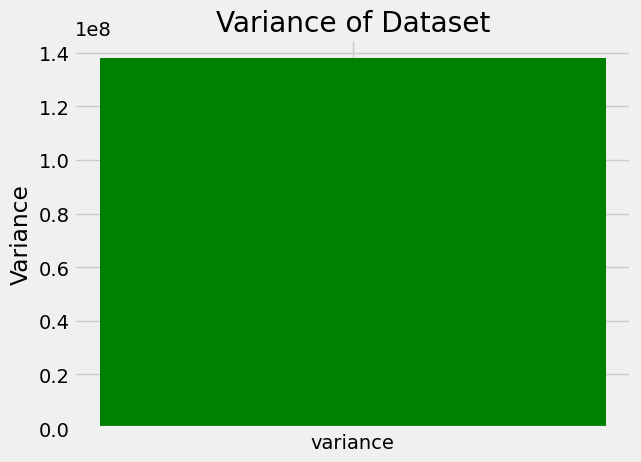

In [190]:
variance = stat.variance(passenger_journey_by_rail_irl_df['passenger'])
plt.bar(['variance'],[variance], color='green')
plt.title('Variance of Dataset')
plt.ylabel('Variance')
plt.show()

### 6.1.3. Shape of Irish Rail Dataset

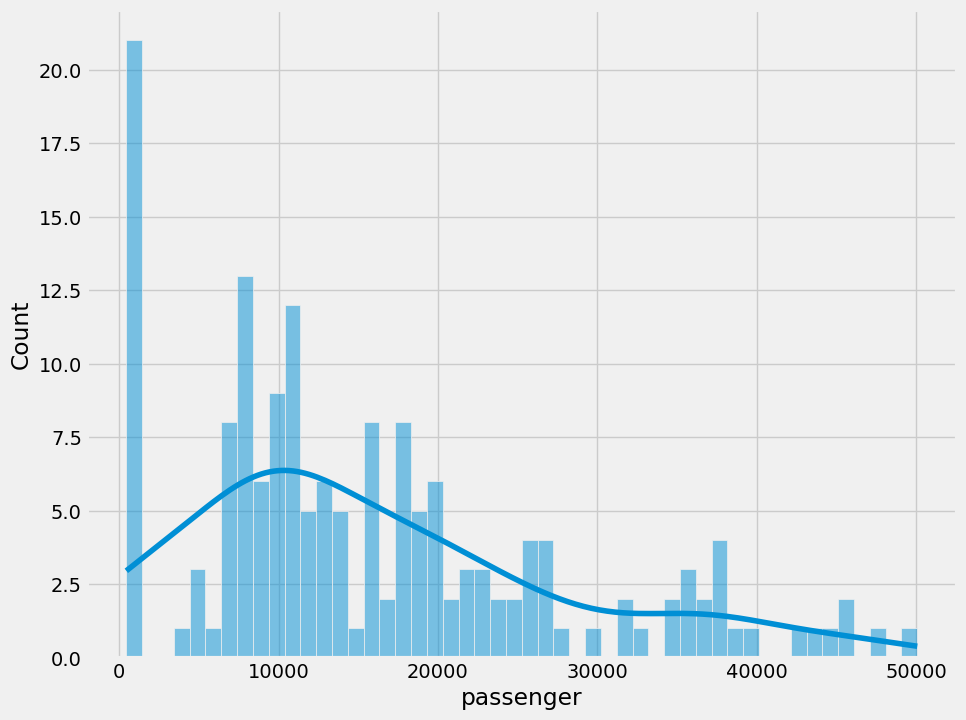

In [191]:
plt.figure(figsize=(10,8))
sns.histplot(data=passenger_journey_by_rail_irl_df, x='passenger', kde=True, bins=50);

#### It show data is partially normally distributed to the left and high varience to right . Hence, It is `Normally Distributed` 

### 6.1.4.1 Skewness of data

In [192]:
passenger_skew_value = stats.skew(passenger_journey_by_rail_irl_df['passenger'], axis=0, bias=True)
print('Skew Value',passenger_skew_value)
print("From above skew is show data is Normally Distributed")

Skew Value 0.8881243031650576
From above skew is show data is Normally Distributed


### 6.1.4.2 Kurtosis of data
    -	If kurtosis value > 0: Leptokurtic i.e. Data is Heavy Tails
    -	If kurtosis value < 0: Platykurtic i.e. Data is Light Tails
    -   If kurtosis value = 0: Mesokurtic i.e. Data is Normally Distributed

In [193]:
kurtosis_value = stats.kurtosis(passenger_journey_by_rail_irl_df['passenger'], axis=0, bias=True)
print('kurtosis Value',kurtosis_value)

if kurtosis_value > 0:
    print('Leptokurtic i.e Data is Heavy Tails')
elif kurtosis_value < 0:
    print('Platykurtic i.e Data is Light Tails')
else:
    print('Mesokurtic i.e Data is Normally Distributed')

kurtosis Value 0.17707297258365395
Leptokurtic i.e Data is Heavy Tails


#### Remove outlier by IQR method

In [194]:
no_outliers_passenger_journey_by_rail_irl_df = remove_outliers(passenger_journey_by_rail_irl_df, 'passenger')

IQR 13832.0
lower_limit -12845.0
upper_limit 42483.0


In [195]:
fig_box_irl_rail = px.box(no_outliers_passenger_journey_by_rail_irl_df, 
             y="passenger",
             title="Passenger journey by Rails in Ireland",
             x="type_of_journey",
             color="type_of_journey"
             ).update_layout(xaxis_title="Journey By", yaxis_title="Passenger")
fig_box_irl_rail.show()

#### Histoplo after reoving outliers

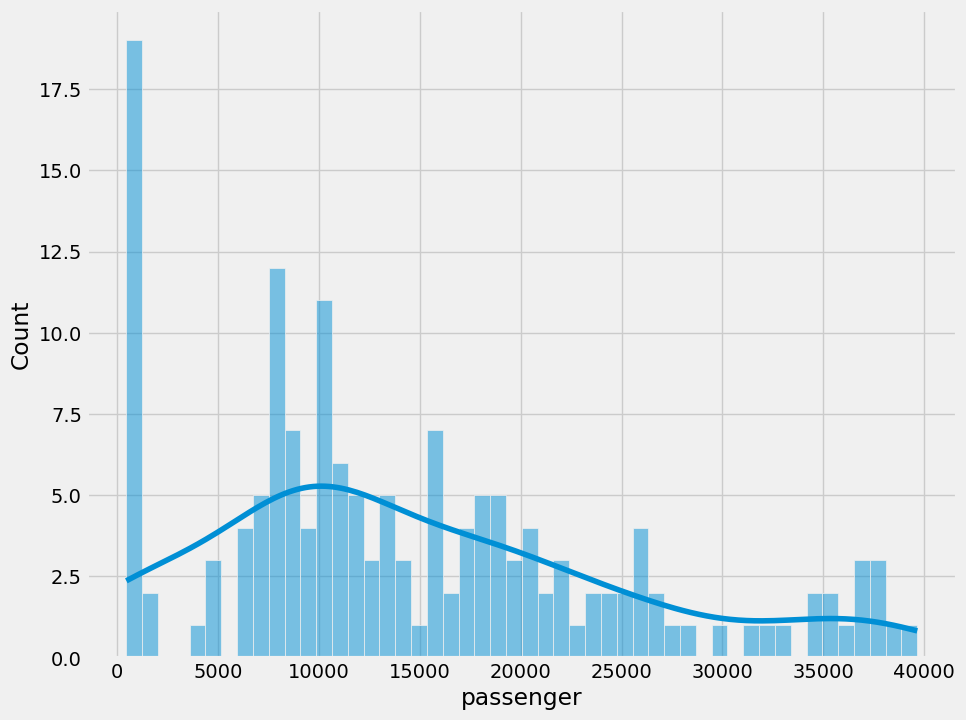

In [196]:
plt.figure(figsize=(10,8))
sns.histplot(data=no_outliers_passenger_journey_by_rail_irl_df, x='passenger', kde=True, bins=50);

## Insights from Paris Rail Dataset

In [197]:
passanger_journey_rail_paris_final_df = no_outliers_passenger_journey_by_rail_paris_df.reset_index(drop=True)
passanger_journey_rail_paris_final_df.head()

type_of_journey            station  passenger               city  year
0           Metro             CRIMEE    6945245              Paris  2013
1           Metro  GRANDS BOULEVARDS    7092775              Paris  2013
2           Metro    PONT DE NEUILLY    6902931  Neuilly Sur Seine  2013
3           Metro   MAIRIE DE CLICHY    6987958             Clichy  2013
4           Metro    SEVRES-BABYLONE    5540265              Paris  2013

### Passenger travel by Type of Rail in Paris

In [198]:
passenger_journey_rail_paris_final = px.line(passanger_journey_rail_paris_final_df.groupby(['year','type_of_journey'], as_index=False)['passenger'].sum(), 
                   x='year', 
                   y='passenger',
                   color='type_of_journey', 
                   symbol='type_of_journey',
                   labels=dict(passenger="Passenger Travel", type_of_journey="Rails"),
                   title='Number of Passanger Travel by Rail in Paris by given years')

# Initilizing dash app
app_rail_paris_final = dash.Dash(__name__)

# Define the Layout of the app
app_rail_paris_final.layout = html.Div(children=[
    html.H4('Passanger Travel by Rail in Paris'),
    html.P("Select your graph:"),
    
    # Dropdown component
       dcc.Dropdown(
        id='chart_type_dropdown_rail_paris', 
        options=[
            {'label': 'Bar Chart', 'value': 'bar'},
            {'label': 'Line Chart', 'value': 'line'}
        ],
        value='line'
    ),
    
    # Graph component
    dcc.Graph(id="graph_paris_lb", figure=passenger_journey_rail_paris_final),
])

# callback to update chart based on the dropdown selection
@app_rail_paris_final.callback(
    Output("graph_paris_lb", "figure"), 
    Input("chart_type_dropdown_rail_paris", "value"))

def update_paris_rail_final(selected_chart):
    # based on selected dropdown value update the figure
    if selected_chart == 'bar':
        update_paris_rail_final = px.bar(passanger_journey_rail_paris_final_df.groupby(['year','type_of_journey'], as_index=False)['passenger'].mean(), 
                   x='type_of_journey', 
                   y='passenger',
                   color='year', 
                   facet_col='year',
                   text_auto='.3s',
                   labels=dict(passenger="Passenger Travel", type_of_journey="Rails"),
                   title='Average Passanger Travel by Rail in Paris by given years')
    else:
        update_paris_rail_final = passenger_journey_rail_paris_final # default figure
        
    return update_paris_rail_final

# Run the app
if __name__ == '__main__':
    app_rail_paris_final.run_server(port = 8053, debug=True, mode='inline', dev_tools_ui=False)

## Passenger travel by Rail in given station and 

In [199]:
fig_bar_paris_rail = px.bar(passanger_journey_rail_paris_final_df.groupby(['station'], as_index=False)['passenger'].sum().nlargest(15,'passenger'), 
              y="station", 
              x="passenger", 
              height=600,
              text_auto='.3s',
             title='Passanger Travel through top 15 Stations in Paris'
             ).update_layout(xaxis_title="Passenger", yaxis_title="Stations")
fig_bar_paris_rail.show()

## Passenger travel by Rail in given City of paris 

In [200]:
fig_bar_paris_rail_city = px.bar(passanger_journey_rail_paris_final_df.groupby(['city'], as_index=False)['passenger'].sum().nlargest(15,'passenger'), 
              y="city", 
              x="passenger", 
              height=600,
              orientation='h', 
              text_auto='.3s',
             title='Passanger Travel through top 15 City of Paris'
             ).update_layout(xaxis_title="Passenger", yaxis_title="Stations")
fig_bar_paris_rail_city.show()

In [201]:
passanger_journey_rail_paris_final_df.groupby(['year','city'],as_index=False)['passenger'].sum()

year                   city  passenger
0    2013                 Antony   11940590
1    2013                Arcueil    6043440
2    2013               Asnieres    5285165
3    2013     Asnieres sur Seine    6312509
4    2013          Aubervilliers   10979284
..    ...                    ...        ...
583  2021                  Torcy    3091308
584  2021              Villejuif    8935576
585  2021              Vincennes   11248258
586  2021  saint-Maur des Fosses    1552324
587  2021                 sceaux     538058

[588 rows x 3 columns]

In [202]:
fig_bar_paris_rail_year = px.bar(passanger_journey_rail_paris_final_df.groupby(['year','city'], as_index=False)['passenger'].median().nlargest(20,'passenger'),
             x="year", 
             y="passenger", 
             height=600,
             color='city',
             barmode='group',
             text_auto='.3s',
             title='Average Passanger Travel through City in Paris Vs Year'
             ).update_layout(xaxis_title="Passenger", yaxis_title="Stations")
fig_bar_paris_rail_year.update_traces(width=.2)
fig_bar_paris_rail_year.show()

In [203]:
passanger_journey_rail_paris_final_df['year'].unique()

array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

## Insights from Ireland Rail Dataset

In [204]:
passanger_journey_rail_irl_final_df = no_outliers_passenger_journey_by_rail_irl_df.reset_index(drop=True)
passanger_journey_rail_irl_final_df = passanger_journey_rail_irl_final_df.query("type_of_journey != 'All journeys'")

### Passenger travel by Rail in given Year Ireland 

In [205]:
fig_line_irl = px.line(passanger_journey_rail_irl_final_df.groupby(['year'], as_index=False)['passenger'].sum(),
                    x='year', 
                    y='passenger',
                    markers=True,
                    labels=dict(passenger="Passenger Travel", type_of_journey="Rails"),
                    title='Number of Passanger Travel by Rail in Ireland by given years')
fig_line_irl.show()

### Passanger travel by type of journey Ireland

In [206]:
fig_bar_irl_rail = px.bar(passanger_journey_rail_irl_final_df.groupby(['type_of_journey'], as_index=False)['passenger'].median(), 
                   x='type_of_journey', 
                   y='passenger',
                   color='type_of_journey', 
                   text_auto='.3s',
                   labels=dict(passenger="Passenger Travel", type_of_journey="Rails"),
                   title='Average Passanger Travel by Rail in Ireland by given years')
fig_bar_irl_rail.show()

## 6.2. Inferential statistics to gain possible Insights

### 6.2.1. Hypothesis Testing 

 ### 6.2.1.1. In the passenger, the average passenger travel by Metro in Paris  is `3250465 Millions` via different stations. A team want to test a new type of train to see if it has positive or negative impact on passenger means of traveling in paris  or no effect. A sample of 50 is taken and has mean of `3029627.66` with a standard deviation of `1633131.2644602086`. Did new train affect on passenger? Use alpha = 0.05.
 
 Note: Sample mean and Sample Standard deviation changes after every refresh because it's dynamic

In [207]:
average_pass_type_of_journey = passanger_journey_rail_paris_final_df.groupby(['type_of_journey'], as_index=False)['passenger'].mean()
average_pass_type_of_journey

type_of_journey     passenger
0           Metro  3.250465e+06
1             RER  2.865405e+06

In [208]:
sample_50_metro = passanger_journey_rail_paris_final_df.query("(type_of_journey == 'Metro')").sample(50).reset_index(drop=True)
sample_mean_metro = stat.mean(sample_50_metro['passenger'])
sample_std_metro = stat.stdev(sample_50_metro['passenger'])
passenger_mean_metro = average_pass_type_of_journey['passenger'].loc[0]
print("Sample Mean", sample_mean_metro)
print("Sample Standard Deviation: ", sample_std_metro)
print("Passenger Mean:", passenger_mean_metro)

Sample Mean 3193138.74
Sample Standard Deviation:  1963630.583223246
Passenger Mean: 3250464.8156956006


In [209]:
def hypothesis_testing(sample_mean, sample_std, passenger_mean, sample_size = 50, alpha = 0.05):
    # calculate t_statistic or t-test
    t_statistic = (sample_mean-passenger_mean) / (sample_std / sample_size ** 0.5) # 0.5 is for square root of sample
    
    # calculate degree of freedom
    degrees_of_freedom = sample_size - 1
    
    # Calculate p-Value (Two Tailed Test)
    p_Value = 2 * (1 - stats.t.cdf(abs(t_statistic), df = degrees_of_freedom))
    
    # Calculate Margin of error
    margin_of_error = stats.t.ppf(1 - alpha / 2, df = degrees_of_freedom) * (sample_std / sample_size ** 0.5)
    
    # Two tailed critical t-value for alpha
    t_critical = stats.t.ppf(1 - alpha / 2, degrees_of_freedom)
    
    # Calculate Confidence Interval
    confidence_interval = (sample_mean- margin_of_error, sample_mean + margin_of_error)
    
    # Print Results
    print(f"t-test/t-statistic:{t_statistic}")
    print(f"Critical t-Value:{t_critical}")
    print(f"p-Value:{p_Value}")
    print(f"Confidence of Interval :{confidence_interval}")
    
    if p_Value < alpha:
        print("Reject the null hypothesis: The new train has a significant impact on passenger means of traveling.")
    else:
        print("Fail to reject the null hypothesis: There is no significant impact of the new train on passenger means of traveling. \n Hence, Null Hypothesis is Accepted")

hypothesis_testing(sample_mean_metro, sample_std_metro, passenger_mean_metro)
    

t-test/t-statistic:-0.20643219355768117
Critical t-Value:2.009575234489209
p-Value:0.8373087078568116
Confidence of Interval :(2635081.1036258424, 3751196.376374158)
Fail to reject the null hypothesis: There is no significant impact of the new train on passenger means of traveling. 
 Hence, Null Hypothesis is Accepted


### 6.2.2. Hypothesis Test Parametric and Nonparametric

 ### 6.2.2.1. In the passenger, the average passenger travel by Rail in Ireland  is `14842.190476` . A team want to test a new type of train to see if it has positive or negative impact on passenger means of traveling in Ireland  or no effect. A sample of 30 is taken and has mean of `13998.033` with a standard deviation of `14842.190`. Did new train affect on passenger? Use alpha = 0.05.
 
 Note: Sample mean and Sample Standard deviation changes after every refresh because it's dynamic

In [210]:
avg_pass_type_journey = passanger_journey_rail_irl_final_df.groupby(['type_of_journey'], as_index=False)['passenger'].mean()
avg_pass_type_journey
# avg_pass_type_journey = passanger_journey_rail_irl_final_df.query("type_of_journey == 'Dublin suburban services'")


type_of_journey     passenger
0                         DART  16906.500000
1     Dublin suburban services  14842.190476
2       International journeys    878.761905
3  Mainline and other services   8931.404762

In [211]:
sample_30_dublin = passanger_journey_rail_irl_final_df.query("(type_of_journey == 'Dublin suburban services')").sample(30).reset_index(drop=True)
sample_mean_dublin = stat.mean(sample_30_dublin['passenger'])
sample_std_dublin = stat.stdev(sample_30_dublin['passenger'])
passenger_mean_dublin = avg_pass_type_journey['passenger'].loc[2]
print("Sample Mean", sample_mean_dublin)
print("Sample Standard Deviation: ", sample_std_dublin)
print("Passenger Mean:", passenger_mean_dublin)

Sample Mean 14017.966666666667
Sample Standard Deviation:  6151.548739577887
Passenger Mean: 878.7619047619048


In [212]:
def hypothesis_test_parametric_nonparametric(sample_mean, sample_std, passenger_mean, sample_size = 30, alpha = 0.05):
    # Parametric Test: t-test
    t_statistic, p_value_ttest = stats.ttest_1samp([sample_mean] * sample_size, passenger_mean)
    
    # Non Parametric test: Wilcoxon Signed-Rank Test
    statistic, p_value_wilcoxon = stats.wilcoxon([sample_mean] * sample_size - passenger_mean)
    
    # Confidence Interval
    margin_of_error = stats.t.ppf(1 - alpha/2, sample_size - 1) * (sample_std / sample_size ** 0.5)
    
    # Calculate Confidence Interval
    confidence_interval = (sample_mean- margin_of_error, sample_mean + margin_of_error)
    
    # Print Results
    print("Parametric Test (t-test)")
    print(f"t-test/t-statistic:{t_statistic}")
    print(f"p-Value:{p_value_ttest}\n")
    
    print("Non Parametric Test (Wilcoxon Signed-Rank Test)")
    print(f"t-test/t-statistic :{statistic}")
    print(f"p-Value:{p_value_wilcoxon}\n")
    
    
    print(f"Confidence of Interval :{confidence_interval}\n")
    
    # Decision based on p-Value
    if p_value_ttest < alpha:
        print("Parametric Test: Reject the null hypothesis: The new train has a significant impact on passenger means of traveling.")
    else:
        print("Parametric Test: Fail to reject the null hypothesis: There is no significant impact of the new train on passenger means of traveling. \n Hence, Null Hypothesis is Accepted")
        
    if p_value_wilcoxon < alpha:
        print("Non Parametric Test: Reject the null hypothesis: The new train has a significant impact on passenger means of traveling.")
    else:
        print("Non Parametric Test: Fail to reject the null hypothesis: There is no significant impact of the new train on passenger means of traveling. \n Hence, Null Hypothesis is Accepted")
    
hypothesis_test_parametric_nonparametric(sample_mean_dublin, sample_std_dublin, passenger_mean_dublin)

Parametric Test (t-test)
t-test/t-statistic:3.889895286889166e+16
p-Value:0.0

Non Parametric Test (Wilcoxon Signed-Rank Test)
t-test/t-statistic :0.0
p-Value:1.862645149230957e-09

Confidence of Interval :(11720.94061674173, 16314.992716591605)

Parametric Test: Reject the null hypothesis: The new train has a significant impact on passenger means of traveling.
Non Parametric Test: Reject the null hypothesis: The new train has a significant impact on passenger means of traveling.


### 6.3. One way ANOVA Test 

### 6.3.1. One way ANOVA Test on different type of journey in Ireland

In [213]:
pass_type_of_journey = passanger_journey_rail_irl_final_df.query("type_of_journey != 'All journeys'").reset_index(drop=True)
pass_type_of_journey

year              type_of_journey  passenger
0    1981  Mainline and other services     7379.0
1    1981     Dublin suburban services     7995.0
2    1982  Mainline and other services     6677.0
3    1982     Dublin suburban services     6136.0
4    1983  Mainline and other services     6523.0
..    ...                          ...        ...
118  2021       International journeys      533.0
119  2022  Mainline and other services    10338.0
120  2022     Dublin suburban services     8740.0
121  2022                         DART    15930.0
122  2022       International journeys      836.0

[123 rows x 3 columns]

#### 6.3.1.1. The Null Hypothesis(H<sub>0</sub>) states that is there no significant in the means of passenger counts among the different type of journey. The Alternate Hypothesis(H<sub>1</sub>) would be that atleast one of the population mean is different. alpha = 0.05

In [214]:
pass_type_of_journey['type_of_journey'].unique()

array(['Mainline and other services', 'Dublin suburban services',
       'International journeys', 'DART'], dtype=object)

In [215]:
# Perform one-way ANOVA 
result_one_way = stats.f_oneway(
    pass_type_of_journey['passenger'][pass_type_of_journey['type_of_journey'] == 'Mainline and other services'],
    pass_type_of_journey['passenger'][pass_type_of_journey['type_of_journey'] == 'Dublin suburban services'],
    pass_type_of_journey['passenger'][pass_type_of_journey['type_of_journey'] == 'DART'],  
)
# Display the result
print("One-way ANOVA Result")
print("F- Statistics", result_one_way.statistic)
print("p- Value", result_one_way.pvalue)

# Decide whether to reject the null hypothesis based on the p-value
alpha = 0.05
if result_one_way.pvalue < alpha :
    print("Reject the null hypothesis: The new train has a significant impact on passenger means of traveling.")
else :
    print("Fail to reject the null hypothesis: There is no significant impact of the new train on passenger means of traveling. \n Hence, Null Hypothesis is Accepted")
    

One-way ANOVA Result
F- Statistics 32.50922377709635
p- Value 1.4020181420511712e-11
Reject the null hypothesis: The new train has a significant impact on passenger means of traveling.


### 6.4. Two way ANOVA Test 

### 6.4.1. Two way ANOVA Test on different type of journey, throught city in Paris

In [216]:
passanger_journey_rail_paris_twoway_anova = passanger_journey_rail_paris_final_df[['type_of_journey','city','passenger']]
passanger_journey_rail_paris_twoway_anova

type_of_journey                   city  passenger
0              Metro                  Paris    6945245
1              Metro                  Paris    7092775
2              Metro      Neuilly Sur Seine    6902931
3              Metro                 Clichy    6987958
4              Metro                  Paris    5540265
...              ...                    ...        ...
3045             RER       Nogent-sur-Marne    2358276
3046             RER                 Cachan    1742783
3047             RER  Saint-Maur des Fosses    1617366
3048             RER              Palaiseau     694838
3049             RER                 Antony     473408

[3050 rows x 3 columns]

In [217]:
import statsmodels.api as sm 
from statsmodels.formula.api import ols 

In [218]:
# Perform Two way ANOVA test
formula = 'passenger ~ C(type_of_journey) + C(city) + C(type_of_journey):C(city)'
model = ols(formula, data = passanger_journey_rail_paris_twoway_anova).fit()


model = ols('passenger ~ C(type_of_journey) + C(city) + C(type_of_journey):C(city)', 
            data=passanger_journey_rail_paris_twoway_anova).fit() 
result = sm.stats.anova_lm(model, type=2) 
result

df        sum_sq       mean_sq          F  \
C(type_of_journey)             1.0  6.463735e+13  6.463735e+13  25.983647   
C(city)                       66.0  2.395648e+15  3.629770e+13  14.591355   
C(type_of_journey):C(city)    66.0  2.060024e+14  3.121248e+12   1.254714   
Residual                    2981.0  7.415585e+15  2.487617e+12        NaN   

                                   PR(>F)  
C(type_of_journey)           3.658216e-07  
C(city)                     3.184822e-135  
C(type_of_journey):C(city)   8.189568e-02  
Residual                              NaN

# 7. Comparision between people travel by Rail in Ireland and Paris in year 2013-2021

In [219]:
irl_passanger_journey_2013_21 = passanger_journey_rail_irl_final_df.query("(year >= 2013) and  (year < 2022)")
irl_passanger_journey_2013_21 = irl_passanger_journey_2013_21.groupby(['year'],as_index=False)['passenger'].sum()
irl_passanger_journey_2013_21['region'] = 'Ireland'
irl_passanger_journey_2013_21

year  passenger   region
0  2013    36739.0  Ireland
1  2014    37804.0  Ireland
2  2015    39660.0  Ireland
3  2016    42816.0  Ireland
4  2017    45505.0  Ireland
5  2018    47961.0  Ireland
6  2019    50060.0  Ireland
7  2020    17931.0  Ireland
8  2021    17411.0  Ireland

In [220]:
paris_passanger_journey_2013_21 = passanger_journey_rail_paris_final_df.groupby(['year'],as_index=False)['passenger'].sum()
paris_passanger_journey_2013_21['region'] = 'Paris'
paris_passanger_journey_2013_21

year   passenger region
0  2013  1131747212  Paris
1  2014  1143479281  Paris
2  2015  1139364794  Paris
3  2016  1151283824  Paris
4  2017  1171341593  Paris
5  2018  1210359205  Paris
6  2019  1155730947  Paris
7  2020   699836465  Paris
8  2021   907848045  Paris

In [221]:
paris_passanger_journey_2013_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   year       9 non-null      int64 
 1   passenger  9 non-null      int64 
 2   region     9 non-null      object
dtypes: int64(2), object(1)
memory usage: 348.0+ bytes


In [222]:
irl_passanger_journey_2013_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       9 non-null      int64  
 1   passenger  9 non-null      float64
 2   region     9 non-null      object 
dtypes: float64(1), int64(1), object(1)
memory usage: 348.0+ bytes


In [223]:
passenger_journey_by_rail_irl_paris_df = pd.concat([irl_passanger_journey_2013_21,paris_passanger_journey_2013_21], ignore_index=True)
passenger_journey_by_rail_irl_paris_df

year     passenger   region
0   2013  3.673900e+04  Ireland
1   2014  3.780400e+04  Ireland
2   2015  3.966000e+04  Ireland
3   2016  4.281600e+04  Ireland
4   2017  4.550500e+04  Ireland
5   2018  4.796100e+04  Ireland
6   2019  5.006000e+04  Ireland
7   2020  1.793100e+04  Ireland
8   2021  1.741100e+04  Ireland
9   2013  1.131747e+09    Paris
10  2014  1.143479e+09    Paris
11  2015  1.139365e+09    Paris
12  2016  1.151284e+09    Paris
13  2017  1.171342e+09    Paris
14  2018  1.210359e+09    Paris
15  2019  1.155731e+09    Paris
16  2020  6.998365e+08    Paris
17  2021  9.078480e+08    Paris

In [1]:
fig_line_irl_paris = px.line(passenger_journey_by_rail_irl_paris_df,
                            x='year',
                            y='passenger',
                            color='region', 
                            symbol='region',
                            labels=dict(passenger="Passenger Travel", type_of_journey="Rails"),
                            title='Passanger Travel by Rail in Ireland by given years'
                           )
fig_line_irl_paris.show()

NameError: name 'px' is not defined

# Machine Learning Models
### Applying Machine Learning Models on Rail Dataset from Paris for  (Simple, Multi, Ridge and Lasso Regression) for Prediction

# 8: Enconding Categorical Data

Step 1: Import library which is done above

Step 2: get the dataset

In [225]:
passanger_journey_rail_paris_final_df.head()

type_of_journey            station  passenger               city  year
0           Metro             CRIMEE    6945245              Paris  2013
1           Metro  GRANDS BOULEVARDS    7092775              Paris  2013
2           Metro    PONT DE NEUILLY    6902931  Neuilly Sur Seine  2013
3           Metro   MAIRIE DE CLICHY    6987958             Clichy  2013
4           Metro    SEVRES-BABYLONE    5540265              Paris  2013

### Data pre-processing 

#### encoding categorical and label data

In [226]:
# calling the method from preprocessing class and assign into variable
lab_encoder = LabelEncoder()               # Label Data or Nominal Data
cat_encoder = OneHotEncoder(sparse=False)  # Categorical Data | Nominal

# assign data frame to new variable encoded_data_frame
encoded_pass_journey_paris_df = passanger_journey_rail_paris_final_df

In [227]:
encoded_pass_journey_paris_df['type_of_journey'].values

array(['Metro', 'Metro', 'Metro', ..., 'RER', 'RER', 'RER'], dtype=object)

In [228]:
encoded_pass_journey_paris_df['type_of_journey'] = cat_encoder.fit_transform(encoded_pass_journey_paris_df[['type_of_journey']])
encoded_pass_journey_paris_df['station'] = lab_encoder.fit_transform(encoded_pass_journey_paris_df['station'])
encoded_pass_journey_paris_df['city'] = lab_encoder.fit_transform(encoded_pass_journey_paris_df['city'])
encoded_pass_journey_paris_df.head(10)

type_of_journey  station  passenger  city  year
0              1.0       89    6945245    48  2013
1              1.0      129    7092775    48  2013
2              1.0      253    6902931    40  2013
3              1.0      183    6987958    18  2013
4              1.0      329    5540265    48  2013
5              1.0      311    4498265    48  2013
6              1.0      290    4925640    48  2013
7              1.0        4    3866326    31  2013
8              1.0      187    3716189    54  2013
9              1.0       46    3612956    48  2013

In [229]:
encoded_pass_journey_paris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3050 entries, 0 to 3049
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   type_of_journey  3050 non-null   float64
 1   station          3050 non-null   int64  
 2   passenger        3050 non-null   int64  
 3   city             3050 non-null   int64  
 4   year             3050 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 119.3 KB


Step 3: generate the correlation matrix using sns.heatmap()

<Axes: >

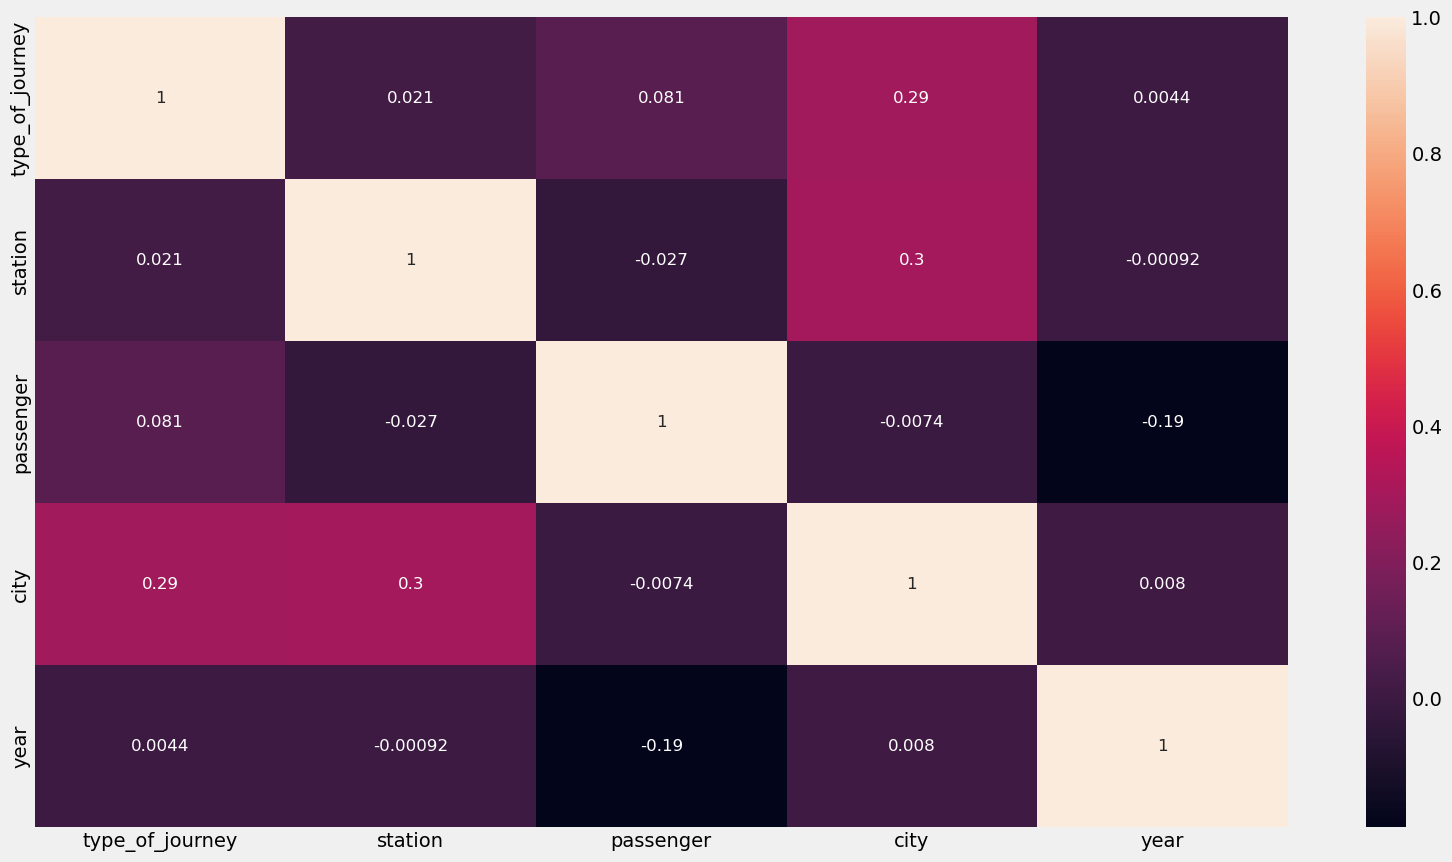

In [230]:
fig , ax = plt.subplots(figsize = (18,10))
corrdat = encoded_pass_journey_paris_df.corr()
sns.heatmap(corrdat , annot = True , annot_kws = {'size':12})

# 9: Features Selection and engineering

Step 4: Select the features which have a high correlation with our target variable weight with threshold 0.02 coefficeient value. 

In [231]:
def getCorrelatedFeature(Corrdata, threshold):
    feature = []
    value = []
    
    for i , index in enumerate(Corrdata.index):
        if abs(Corrdata[index])>threshold:
            feature.append(index)
            value.append(Corrdata[index])
    df = pd.DataFrame(data = value, index = feature, columns = ['correlation_value'])
    return df
threshold = 0.002
corr_value = getCorrelatedFeature(corrdat['passenger'],threshold)
corr_value

correlation_value
type_of_journey           0.080895
station                  -0.026707
passenger                 1.000000
city                     -0.007378
year                     -0.188940

Step 5: Recreate the dataset which contains only high correlation features with target variable weight.

In [232]:
encoded_pass_journey_paris_df = encoded_pass_journey_paris_df[corr_value.index]

### Data visualisation


Step 6: Generate the scatter plot to visualise the change in variables. Example: target variable passenger with high correlated feature.

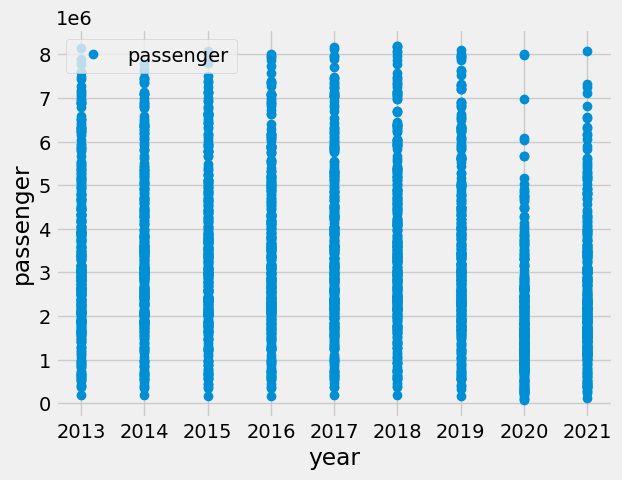

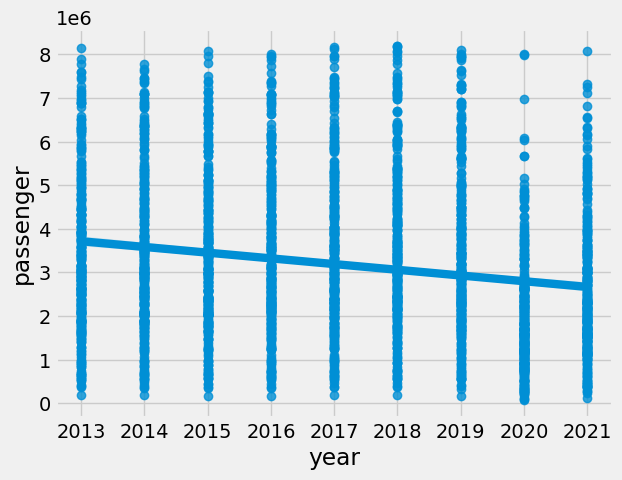

In [233]:
#visualise the change in variables
encoded_pass_journey_paris_df.plot(x='year',y='passenger',style='o')
plt.xlabel('year')
plt.ylabel('passenger')
plt.show()

sns.regplot(x="year",y="passenger", data=encoded_pass_journey_paris_df)
plt.show()

### Scaling Data i.e Standarization, Gussian distributed

In [234]:
scalar = StandardScaler() # Creating object of class StandardScaler() from sklearn.preprocessing 
encoded_pass_journey_paris_df = pd.DataFrame(scalar.fit_transform(encoded_pass_journey_paris_df), columns=encoded_pass_journey_paris_df.columns)
encoded_pass_journey_paris_df.shape

(3050, 5)

In [235]:
encoded_pass_journey_paris_df.head()

type_of_journey   station  passenger      city      year
0         0.457032 -0.871857   2.090112  0.388192 -1.563073
1         0.457032 -0.487104   2.172092  0.388192 -1.563073
2         0.457032  0.705631   2.066599 -0.202067 -1.563073
3         0.457032  0.032313   2.113847 -1.825279 -1.563073
4         0.457032  1.436662   1.309383  0.388192 -1.563073

### Model 1: Simple Linear Regression

Step 7: prepare data for  simple linear regression model with one independent variable which has highest correlation with passenger.

In [236]:
simple_reg_data = encoded_pass_journey_paris_df.groupby(['year'], as_index=False)['passenger'].sum()
simple_reg_data.head()

year  passenger
0 -1.563073  41.499751
1 -1.177831  46.249837
2 -0.792588  43.963472
3 -0.407346  48.817450
4 -0.022104  59.963285

Step 8: Divide dependent and independent variable.

In [237]:
#Divide data into dependent and independent variables into x and y
X = simple_reg_data.drop(labels = ['year'], axis = 1)
y = simple_reg_data['passenger']
print(X.shape,y.shape)

(9, 1) (9,)


Step 9: Split the dataset into training and testing using train_test_split()

### Spliting Data
split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset

In [238]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape , X_test.shape, y_train.shape,y_test.shape

((7, 1), (2, 1), (7,), (2,))

### Train simple linear regression model
Step 10: Train simple linear regression model using LinearRegression() from sklearn.linear_model and predict the test data.

In [239]:
from sklearn.linear_model import LinearRegression
simple_reg_model = LinearRegression()
simple_reg_model.fit(X_train , y_train)
predict = simple_reg_model.predict(X_test)

In [240]:
# Score for testing and training 
simple_reg_train_score = simple_reg_model.score(X_train,y_train)
simple_reg_test_score = simple_reg_model.score(X_test,y_test)
print(f"Best Training Score: {simple_reg_train_score*100}%")
print(f"Best Testing Score: {simple_reg_test_score*100}%")

Best Training Score: 100.0%
Best Testing Score: 100.0%


In [241]:
print('Best fit line has the intercept value of', simple_reg_model.intercept_)
print('Best fit line has the slope value of', simple_reg_model.coef_)

Best fit line has the intercept value of 0.0
Best fit line has the slope value of [1.]


In [242]:
#compare actual and predicted value of Price from simple linear regression.
simple_reg_compare = pd.DataFrame({"Predicted":predict , "Actual": y_test})
simple_reg_compare.head(10)

Predicted      Actual
7 -246.277555 -246.277555
1   46.249837   46.249837

In [243]:
# Make Prediction
y_predict_train = simple_reg_model.predict(X_train)
y_predict_test = simple_reg_model.predict(X_test)

simple_reg_model.predict([[2025]])

array([2025.])

### Performance evaluation of simple linear regression

Step 11: Evaluate the performance of simple linear regression by taking an account of r2_score , mean_absolute_error, mean_squared_error

In [244]:
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error
print('R2 score of this model:', r2_score(y_test, predict))
print('Mean absolute error of this model:', mean_absolute_error(y_test, predict))
print('Mean squared error of this model:', mean_squared_error(y_test, predict))
print('Root mean squared error of this model:', np.sqrt(mean_squared_error(y_test, predict)))

R2 score of this model: 1.0
Mean absolute error of this model: 0.0
Mean squared error of this model: 0.0
Root mean squared error of this model: 0.0


### Model 2: Multi Linear Regression Model

In [245]:
#divide dataset into dependent and independent variable
X_multi = encoded_pass_journey_paris_df.drop(labels = ['passenger'], axis = 1)
y_multi = encoded_pass_journey_paris_df['passenger']
X_multi.head()

type_of_journey   station      city      year
0         0.457032 -0.871857  0.388192 -1.563073
1         0.457032 -0.487104  0.388192 -1.563073
2         0.457032  0.705631 -0.202067 -1.563073
3         0.457032  0.032313 -1.825279 -1.563073
4         0.457032  1.436662  0.388192 -1.563073

In [246]:
y_multi.head()

0    2.090112
1    2.172092
2    2.066599
3    2.113847
4    1.309383
Name: passenger, dtype: float64

In [247]:
#Spliting Data into train and test
from sklearn.model_selection import train_test_split
Xmulti_train, Xmulti_test , ymulti_train, ymulti_test = train_test_split(X_multi, y_multi, test_size = 0.2, random_state = 42 )
Xmulti_train.shape , Xmulti_test.shape, ymulti_train.shape,ymulti_test.shape

((2440, 4), (610, 4), (2440,), (610,))

### Train multiple linear regression model
Step 12 : Train multiple linear regression model using LinearRegression() from sklearn.linear_model and predict the test data.

In [248]:
multi_reg_model = LinearRegression()
multi_reg_model.fit(Xmulti_train , ymulti_train)
multi_reg_predict = multi_reg_model.predict(Xmulti_test)

In [249]:
# Score for testing and training 
multi_reg_train_score = multi_reg_model.score(Xmulti_train,ymulti_train)
multi_reg_test_score = multi_reg_model.score(Xmulti_test,ymulti_test)
print(f"Best Training Score: {simple_reg_train_score*100}%")
print(f"Best Testing Score: {simple_reg_test_score*100}%")

Best Training Score: 100.0%
Best Testing Score: 100.0%


In [250]:
print('Best fit line has the intercept value of', multi_reg_model.intercept_)
print('Best fit line has the slope value of', multi_reg_model.coef_)

Best fit line has the intercept value of 0.008964999844143678
Best fit line has the slope value of [ 0.09320004 -0.02725691 -0.02250955 -0.19773085]


In [251]:
#compare actual and predicted value of Price from simple linear regression.
multi_reg_compare = pd.DataFrame({"Predicted":multi_reg_predict , "Actual": ymulti_test})
multi_reg_compare.head(10)

Predicted    Actual
1517   0.005150  0.100113
2369  -0.212886 -0.824428
1961  -0.070762  0.246456
343    0.315219  0.683073
2663  -0.449099 -1.097271
1173   0.141888 -0.760982
2676  -0.225208 -1.477796
1027  -0.058916 -1.149583
2083  -0.075623  2.294119
1444  -0.099867 -0.527035

Step 14: Making prediction

In [252]:
# Make Prediction
y_predict_train = multi_reg_model.predict(Xmulti_train)
y_predict_test = multi_reg_model.predict(Xmulti_test)

multi_reg_model.predict([[1.0,329,48,2025]])
# Metro, SEVRES-BABYLONE,Paris,2013
# multi_reg_model.predict([['Metro','SEVRES-BABYLONE','Paris',2025]])


array([-410.35079083])

### Performance evaluation of multiple linear regression
Step 13: Evaluate the performance of multiple linear regression using r2_score , mean_absolute_error, mean_squared_error

In [253]:
print('R2 score of multiple LR model:', r2_score(ymulti_test, multi_reg_predict))
print('Mean absolute error of multiple LR model:', mean_absolute_error(ymulti_test, multi_reg_predict))
print('Mean squared error of multiple LR model:', mean_squared_error(ymulti_test, multi_reg_predict))
print('Root mean squared error of multiple LR model:', np.sqrt(mean_squared_error(ymulti_test, multi_reg_predict)))

R2 score of multiple LR model: 0.029471600524109243
Mean absolute error of multiple LR model: 0.7421261015965507
Mean squared error of multiple LR model: 0.8506420304260763
Root mean squared error of multiple LR model: 0.9223025698902049


Step 14 : Compare the results of two models.

In [254]:
simple_multi_reg_model_score = {
    "Metrics": ['r2 Score','Mean Absolute Error','Mean Squared Error','Root Mean Squared Error', 'r2 Score', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error'],
    "Score":[r2_score(y_test, predict),mean_absolute_error(y_test, predict), mean_squared_error(y_test, predict), np.sqrt(mean_squared_error(y_test, predict)),
            r2_score(ymulti_test, multi_reg_predict),mean_absolute_error(ymulti_test, multi_reg_predict), mean_squared_error(ymulti_test, multi_reg_predict),
             np.sqrt(mean_squared_error(ymulti_test, multi_reg_predict))
            ],
    "Model": ['Simple Linear Regression', 'Simple Linear Regression', 'Simple Linear Regression', 'Simple Linear Regression', 'Multi Linear Regression', 'Multi Linear Regression', 'Multi Linear Regression', 'Multi Linear Regression'],
}

simple_multi_reg_model_score_df = pd.DataFrame(simple_multi_reg_model_score)

In [255]:
simple_multi_reg_model_score_df

Metrics     Score                     Model
0                 r2 Score  1.000000  Simple Linear Regression
1      Mean Absolute Error  0.000000  Simple Linear Regression
2       Mean Squared Error  0.000000  Simple Linear Regression
3  Root Mean Squared Error  0.000000  Simple Linear Regression
4                 r2 Score  0.029472   Multi Linear Regression
5      Mean Absolute Error  0.742126   Multi Linear Regression
6       Mean Squared Error  0.850642   Multi Linear Regression
7  Root Mean Squared Error  0.922303   Multi Linear Regression

In [256]:
bar_fig_regression_model = px.bar(simple_multi_reg_model_score_df, 
                   y="Score", 
                   x='Metrics',
                   color='Model', 
                   barmode='group',
                   text_auto='.3s',
                   title='Simple Linear and Multi Linear Regression Score')
bar_fig_regression_model.show()

### Model 3: Ridge Regression

Step.1. Import Library

In [257]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from statsmodels.tools.eval_measures import mse, rmse

Step.2. Dependent and Independent variable

In [258]:
X_ridge = encoded_pass_journey_paris_df.drop(labels = ['passenger'], axis = 1)
y_ridge = encoded_pass_journey_paris_df['passenger']

Step.3. Traning and Testing data

In [259]:
XRidge_train, XRidge_test , yRidge_train, yRidge_test = train_test_split(X_ridge, y_ridge, test_size = 0.2, random_state = 42 )
XRidge_train.shape , XRidge_test.shape, yRidge_train.shape,yRidge_test.shape

((2440, 4), (610, 4), (2440,), (610,))

Step.4. Apply ML Model

In [260]:
### Using GridSearchCV for parameter optimization

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regression=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regression.fit(XRidge_train,yRidge_train)
ridge_value = ridge_regression.best_estimator_

Step.5. Best Params and Best Score

In [261]:
print(ridge_regression.best_params_)
print(ridge_regression.best_score_)
print(ridge_value)

{'alpha': 55}
-0.9860443465235781
Ridge(alpha=55)


Step.6. Make Predictions

In [262]:
# Make prediction 
y_ridge_pridct_train = ridge_value.predict(XRidge_train)
y_ridge_pridct_test = ridge_value.predict(XRidge_test)

Step.7. Display score

In [263]:
print("R-squared of the model in training set is: {}".format(ridge_value.score(XRidge_train, yRidge_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ridge_value.score(XRidge_test, yRidge_test)))
print("Root mean squared error of the prediction is: {}".format(mse(yRidge_test, y_ridge_pridct_test)**(1/2)))
print("Mean absolute  error of the prediction is: {}".format(np.mean(np.abs((yRidge_test - y_ridge_pridct_test) / yRidge_test)) * 100))

R-squared of the model in training set is: 0.04631893863279546
-----Test set statistics-----
R-squared of the model in test set is: 0.029991141796328114
Root mean squared error of the prediction is: 0.9220556742838504
Mean absolute  error of the prediction is: 131.15836000284048


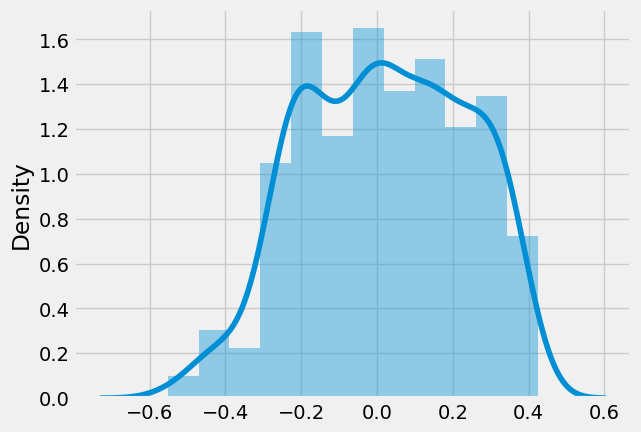

In [264]:
sns.distplot(y_ridge_pridct_test);

### Model 4: Lasso Regression

Step.1. Import Library

In [265]:
from sklearn.linear_model import Lasso
X_lasso = X_ridge
y_lasso = y_ridge

In [266]:
Xlasso_train, Xlasso_test , ylasso_train, ylasso_test = train_test_split(X_lasso, y_lasso, test_size = 0.2, random_state = 42 )
Xlasso_train.shape , Xlasso_test.shape, ylasso_train.shape,ylasso_test.shape

((2440, 4), (610, 4), (2440,), (610,))

In [267]:
### Using GridSearchCV for parameter optimization

lasso_regression = GridSearchCV(Lasso(), param_grid=parameters, cv=5)
lasso_regression.fit(Xlasso_train, ylasso_train)
lasso_value = lasso_regression.best_estimator_

In [268]:
# Make prediction 
y_lasso_pridct_train = lasso_value.predict(Xlasso_train)
y_lasso_pridct_test = lasso_value.predict(Xlasso_test)

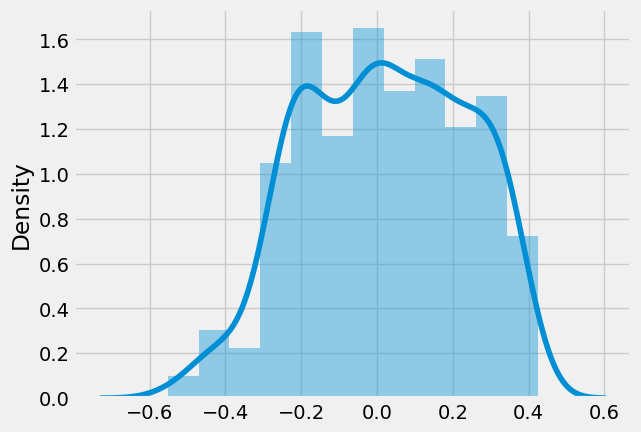

In [269]:
sns.distplot(y_ridge_pridct_test);

In [270]:
print("R-squared of the model in Training set is: {}\n".format(round(lasso_value.score(Xlasso_train,ylasso_train)*100,3)))
print("*****Statistical Value for Test Model*****\n")
print("R-squared of the model in Test set is: {}".format(round(lasso_value.score(Xlasso_test,ylasso_test)*100,3)))
print("Root mean squared error of the prediction is: {}".format(round(rmse(ylasso_test,y_lasso_pridct_test)*100,3)))
print("Mean absolute error of the prediction is: {}".format(round(np.mean(np.abs((ylasso_test - y_lasso_pridct_test)/ ylasso_test))*100,3)))

R-squared of the model in Training set is: 4.634

*****Statistical Value for Test Model*****

R-squared of the model in Test set is: 2.965
Root mean squared error of the prediction is: 92.222
Mean absolute error of the prediction is: 131.719


### Comaprision between Ridge and Lasso Score

In [271]:


ridge_lasso_reg_model_score = {
    "Metrics": ['R-square Training','R-square Testing','Root mean squared error','Mean absolute error','R-square Training','R-square Testing','Root mean squared error','Mean absolute error'],
    "Score":[format(ridge_value.score(XRidge_train, yRidge_train)),
             format(round(lasso_value.score(Xlasso_test,ylasso_test)*100,3)),
             format(round(rmse(ylasso_test,y_lasso_pridct_test)*100,3)),
             format(round(np.mean(np.abs((ylasso_test - y_lasso_pridct_test)/ ylasso_test))*100,3)),
             
             format(round(lasso_value.score(Xlasso_train,ylasso_train)*100,3)),
             format(round(lasso_value.score(Xlasso_test,ylasso_test)*100,3)),
             format(round(rmse(ylasso_test,y_lasso_pridct_test)*100,3)),
             format(round(np.mean(np.abs((ylasso_test - y_lasso_pridct_test)/ ylasso_test))*100,3))
             
            ],
    "Model": ['Ridge Regression', 'Ridge Regression', 'Ridge Regression', 'Ridge Regression', 'Lasso Regression', 'Lasso Regression', 'Lasso Regression', 'Lasso Regression'],
}

ridge_lasso_reg_model_score_df = pd.DataFrame(ridge_lasso_reg_model_score)

In [272]:
ridge_lasso_reg_model_score_df

Metrics                Score             Model
0        R-square Training  0.04631893863279546  Ridge Regression
1         R-square Testing                2.965  Ridge Regression
2  Root mean squared error               92.222  Ridge Regression
3      Mean absolute error              131.719  Ridge Regression
4        R-square Training                4.634  Lasso Regression
5         R-square Testing                2.965  Lasso Regression
6  Root mean squared error               92.222  Lasso Regression
7      Mean absolute error              131.719  Lasso Regression

In [273]:
bar_fig_regression_model = px.bar(ridge_lasso_reg_model_score_df, 
                   y="Score", 
                   x='Metrics',
                   color='Model', 
                   barmode='group',
                   text_auto='.3s',
                   title='Ridge and Lasso Regression Model Score in Percentage')
bar_fig_regression_model.show()

# 9. Sentiment Analysis

## 9.1. Sentiment Analysis  on Public Transport

Step.1. Import Library

In [274]:
import praw
from datetime import datetime as dt
from dotenv import load_dotenv
from os import getenv

Step.2. load dot environment

In [275]:
load_dotenv()

True

Step.3. Import Credentials

In [276]:
reddit = praw.Reddit(
    client_id=getenv("APP_ID"), # personal use script'
    client_secret=getenv("APP_SECRET"),  # secret 
    user_agent=f"{getenv('APP_NAME')} u/{getenv('REDDIT_USERNAME')}", # app-name u/username
)

In [277]:
print(reddit.read_only)

True


Step.4. Get data related topic

In [278]:
def get_topic_related_comment(subreddit_name, topic_keyword, country):
    #Get the subreddit
    subreddit = reddit.subreddit(subreddit_name)
    
    # Extract comments from the submission and store in a Dataframe
    comments_data = {
        "author": [],
        "comment":[],
        "score":[],
        "created_datetime":[]
    }
    
    #get the submissions matching the keyword
    submissions = subreddit.search(topic_keyword, limit = 1)
    for submission in submissions:
        submission.comments.replace_more(limit = None)
        for comment in submission.comments.list():
            comments_data['author'].append(comment.author.name if comment.author else "[deleted]")
            comments_data['comment'].append(comment.body)
            comments_data['score'].append(comment.score)
            comments_data['created_datetime'].append(dt.utcfromtimestamp(comment.created_utc))
            
         
    comments_df = pd.DataFrame(comments_data)
    if country == 'Ireland':
        comments_df.to_csv("reddit_ireland_public_transport_comment.csv", index=False)
    else:
        comments_df.to_csv("reddit_Netherlands_public_transport_comment.csv", index=False)
    
# Specify the subreddit and topic keyword
get_topic_related_comment(
    subreddit_name = "ireland",
#     topic_keyword = "Poll: Would you support a subsidised €9 monthly public transport ticket?",
    topic_keyword = "Dublin is worst capital in Europe for public transport ticket pricing, finds Greenpeace",
    country = "Ireland"
)    

In [279]:
get_topic_related_comment(
    subreddit_name = "Netherlands",
    topic_keyword = "Thoughts on free public transport in Netherlands?",
    country = "Netherlands"
)    

### 9.1.1 Sentiment Analysis on Ireland Public Transport Review

In [280]:
irl_public_transport = pd.read_csv(r"./reddit_ireland_public_transport_comment.csv")
irl_public_transport.head()

author                                            comment  score  \
0       svmk1987  The issue with public transport in Dublin is n...    506   
1  Shmokeahontis  If you think it’s bad in Dublin, try outside D...    192   
2          fwaig  Imagine you could use busses without needing c...    285   
3      [deleted]  For those blocked by the pay wall:\n\nDublin h...     42   
4   chapkachapka  For anyone interested, here is the actual stud...     45   

      created_datetime  
0  2023-05-04 04:29:13  
1  2023-05-04 07:10:57  
2  2023-05-04 05:37:44  
3  2023-05-04 06:45:17  
4  2023-05-04 07:31:44

### EDA for text data

In [281]:
irl_public_transport.shape

(280, 4)

In [282]:
irl_public_transport.isna().sum()

author              0
comment             0
score               0
created_datetime    0
dtype: int64

In [283]:
irl_public_transport.duplicated().sum()

0

## Text Processing

### 1. Basic Feature Extraction

#### 1.1. Word count

In [284]:
# Word count
irl_public_transport['word_count'] = irl_public_transport['comment'].apply(lambda x: len(str(x).split(" ")))

#### 1.2. Text count

In [285]:
# Text count
irl_public_transport['text_count'] = irl_public_transport['comment'].str.len()

#### 1.3. Average count

In [286]:
# average word
def average_word(text):
    words = text.split()
    return (sum(len(word) for word in words)/len(words))
irl_public_transport['avg_word'] = irl_public_transport['comment'].apply(lambda x: average_word(x))

#### 1.4. import and count stopwords present in text

In [287]:
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [288]:
irl_public_transport['stopwords'] = irl_public_transport['comment'].apply(lambda x: len([x for x in x.split() if x in stop]))

#### 1.5. Count number of subreddit present in text

In [289]:
irl_public_transport['subreddit'] = irl_public_transport['comment'].apply(lambda x: len([x for x in x.split() if x.startswith('r/')]))

#### 1.6. Count number of user present in text

In [290]:
irl_public_transport['username'] = irl_public_transport['comment'].apply(lambda x: len([x for x in x.split() if x.startswith('u/')]))

#### 1.7. Check for numeric value

In [291]:
irl_public_transport['numerics'] = irl_public_transport['comment'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))

#### Check for number of uppercase 

In [292]:
irl_public_transport['upper'] = irl_public_transport['comment'].apply(lambda x: len([x for x in x.split() if x.isupper()]))

### 2. Basic Pre-processing

#### 2.1. change uppercase letter into lower

In [293]:
irl_public_transport['comment'] = irl_public_transport['comment'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#### 2.2. Removing punctuation

In [294]:
irl_public_transport['comment'] = irl_public_transport['comment'].str.replace('[^\w\s]','')

#### 2.3. Removal of stop words

In [295]:
irl_public_transport['comment'] = irl_public_transport['comment'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [296]:
import re
irl_public_transport['comment'] = irl_public_transport['comment'].apply(lambda x: re.sub(r'\bhttps\w*\b', '', x))

#### 2.4. Common word removal 

In [297]:
# count of common words
frequency = pd.Series(' '.join(irl_public_transport['comment']).split()).value_counts()[:20]
frequency

bus          100
dublin        91
transport     76
get           63
city          59
public        54
would         49
people        47
card          38
dont          36
2             36
lines         33
travel        33
routes        31
luas          30
like          30
need          30
ticket        28
every         28
one           27
dtype: int64

In [298]:
# removal of common words
frequency = list(frequency.index)
irl_public_transport['comment'] = irl_public_transport['comment'].apply(lambda x: " ".join(x for x in x.split() if x not in frequency))

#### 2.5. Removal  of rare words

In [299]:
#Count of rare words
frequency = pd.Series(' '.join(irl_public_transport['comment']).split()).value_counts()[-20:]
frequency

story             1
till              1
gdp               1
figures           1
depths            1
poverty           1
clearly           1
visitor           1
mystery           1
carries           1
anymore           1
toilet            1
conversation      1
waits             1
holds             1
monopoly          1
key               1
means             1
responsibility    1
asked             1
dtype: int64

In [300]:
# Removal of rare words
irl_public_transport['comment'] = irl_public_transport['comment'].apply(lambda x: " ".join(x for x in x.split() if x not in frequency))

#### 2.6. Spelling Correction

In [301]:
from textblob import TextBlob
# irl_public_transport['comment'].apply(lambda x: str(TextBlob(x).correct()))

#### 2.7. Tokenization

In [302]:
TextBlob(irl_public_transport['comment'][1]).words

WordList(['think', 'bad', 'try', 'outside', 'two', 'towns', 'mri', 'week', 'driving', '15', 'minute', 'journey', 'took', '5', 'hours', '5', 'hours', 'town', 'home', 'mri', 'appointment', 'done', '20', 'minutes', 'still', 'couldnt', 'go', 'home', 'hours', 'remember', 'growing', 'walking', 'school', 'along', 'old', 'disused', 'rail', 'tracks', 'took', 'tracks', 'eventually', 'poured', 'tarmac', 'called', 'greenway', 'even', 'framework', 'rail', 'cost', 'time', 'takes', 'b', 'using', 'makes', 'whole', 'venture', 'worth', 'unless', 'choice'])

#### 2.8. Stemming

In [303]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
irl_public_transport['comment'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0      issu afford though use instead drive easili re...
1      think bad tri outsid two town mri week drive 1...
2      imagin could use buss without need coin use ba...
3      block pay wall rank worst among 30 european ca...
4      anyon interest actual studi despit headlin iri...
                             ...                        
275    train book straight away hate could go quick e...
276                               narwhal bacon midnight
277                                  great main question
278                               narwhal bacon midnight
279    definit link use exactli see meaning consist t...
Name: comment, Length: 280, dtype: object

#### 2.9. Lemmatization

In [304]:
from textblob import Word
irl_public_transport['comment'] = irl_public_transport['comment'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))


## Advance Text Processing

#### 3.1.  N-grams

In [305]:
irl_public_transport['bigrams'] = irl_public_transport['comment'].apply(lambda x: TextBlob(x).ngrams(2))

#### 3.2. Term frequency

In [306]:
tf1 = (irl_public_transport['comment']).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']

#### 3.3 Inverse Document Frequency

In [307]:
for i,word in enumerate(tf1['words']):
    tf1.loc[i, 'idf'] = np.log(irl_public_transport.shape[0]/(len(irl_public_transport[irl_public_transport['comment'].str.contains(word)])))

tf1.head()

words    tf       idf
0         better  24.0  2.590267
1          issue  19.0  2.801576
2  affordability   4.0  4.248495
3         though  10.0  3.149883
4            use  25.0  1.763589

#### 3.4 Term Frequency – Inverse Document Frequency (TF-IDF)

In [308]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1.head()

words    tf       idf      tfidf
0         better  24.0  2.590267  62.166412
1          issue  19.0  2.801576  53.229949
2  affordability   4.0  4.248495  16.993981
3         though  10.0  3.149883  31.498830
4            use  25.0  1.763589  44.089715

In [309]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
stop_words= 'english',ngram_range=(1,1))
irl_public_transport_vect = tfidf.fit_transform(irl_public_transport['comment'])
irl_public_transport_vect
# print(irl_public_transport_vect)

<280x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 3371 stored elements in Compressed Sparse Row format>

#### 3.5. Bag of Words

In [310]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
irl_public_transport_bow = bow.fit_transform(irl_public_transport['comment'])
irl_public_transport_bow
# print(irl_public_transport_bow)

<280x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 3843 stored elements in Compressed Sparse Row format>

#### 3.6 Sentiment Analysis

In [311]:
irl_public_transport['sentiment'] = irl_public_transport['comment'].apply(lambda x: TextBlob(x).sentiment[0])

#### get_sentiment_label() function

In [312]:
# Define threshold values
positive_threshold = 0.2
negative_threshold = -0.2

def get_sentiment_label(text_column, positive_threshold, negative_threshold):
    return pd.cut(text_column, bins= [float('-inf'), negative_threshold, positive_threshold, float('inf')], labels=['negative', 'neutral', 'positive'])

irl_public_transport['sentiment_label'] = get_sentiment_label(irl_public_transport['sentiment'], positive_threshold, negative_threshold)


In [313]:
irl_public_transport[['comment','sentiment','sentiment_label']].head()

comment  sentiment  \
0  issue affordability though use instead driving...   0.477778   
1  think bad try outside two town mri week drivin...  -0.020000   
2  imagine could use bus without needing coin use...   0.050000   
3  blocked pay wall ranked worst among 30 europea...  -0.111039   
4  anyone interested actual study despite headlin...   0.097222   

  sentiment_label  
0        positive  
1         neutral  
2         neutral  
3         neutral  
4         neutral

## Result of Sentiment Analysis on Ireland Public Transport (Dublin is worst capital in Europe for public transport ticket pricing, finds Greenpeace) 

In [314]:
irl_public_transport['sentiment_label'].value_counts()

neutral     178
positive     58
negative     44
Name: sentiment_label, dtype: int64

### 9.1.2 Sentiment Analysis on Netherlands Public Transport Review

In [315]:
netherlands_public_transport = pd.read_csv(r"./reddit_Netherlands_public_transport_comment.csv")
netherlands_public_transport

author                                            comment  score  \
0        Nibor0113                       A bit cheaper wouldn't hurt.    414   
1       Sea-Ad9057  im in favour of it ... but right now i  would ...    342   
2      Peppertails  I wouldn't mind paying for public transport if...    180   
3         Snownova  Yes I'm in favor of it, or at the very least n...    283   
4    Batmanroggers  It cost me around 300 euros a month, going to ...     77   
..             ...                                                ...    ...   
396    leftbrendon  Geen van die plekken liggen in Flevoland. Er b...      1   
397     Blussert31  Yeah, but I've been hoping they'd clean up but...      1   
398     Blussert31  >I don't think that comparison works because f...      1   
399    DutchDave87                   Almere, Lelystad of Dronten dan.      1   
400       SHiNeyey                    I don't think I would, no. You?      1   

        created_datetime  
0    2023-08-07 08:47:26  
1    2023-08-07 08:39:32  
2    2023-08-07 09:13:57  
3    2023-08-07 08:33:23  
4    2023-08-07 09:01:37  
..                   ...  
396  2023-08-08 11:35:24  
397  2023-08-07 14:21:42  
398  2023-08-07 14:16:58  
399  2023-08-08 11:41:24  
400  2023-08-07 14:22:12  

[401 rows x 4 columns]

In [316]:
netherlands_public_transport.shape

(401, 4)

In [317]:
netherlands_public_transport.isna().sum()

author              0
comment             0
score               0
created_datetime    0
dtype: int64

In [318]:
netherlands_public_transport.duplicated().sum()

0

In [319]:
# Word count
netherlands_public_transport['word_count'] = irl_public_transport['comment'].apply(lambda x: len(str(x).split(" ")))

In [320]:
# Text count
netherlands_public_transport['text_count'] = irl_public_transport['comment'].str.len()

In [321]:
# average word
netherlands_public_transport['avg_word'] = netherlands_public_transport['comment'].apply(lambda x: average_word(x))

In [322]:
# stopword in text
netherlands_public_transport['stopwords'] = netherlands_public_transport['comment'].apply(lambda x: len([x for x in x.split() if x in stop]))

In [323]:
# count for subreddit
netherlands_public_transport['subreddit'] = netherlands_public_transport['comment'].apply(lambda x: len([x for x in x.split() if x.startswith('r/')]))

In [324]:
# count for user 
netherlands_public_transport['username'] = netherlands_public_transport['comment'].apply(lambda x: len([x for x in x.split() if x.startswith('u/')]))

In [325]:
# numeric value in comment
netherlands_public_transport['numerics'] = netherlands_public_transport['comment'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))

In [326]:
# uppercase letter in comment
netherlands_public_transport['upper'] = netherlands_public_transport['comment'].apply(lambda x: len([x for x in x.split() if x.isupper()]))

In [327]:
# change uppercase letter into lower
netherlands_public_transport['comment'] = netherlands_public_transport['comment'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [328]:
# Removing punctuation
netherlands_public_transport['comment'] = netherlands_public_transport['comment'].str.replace('[^\w\s]','')

In [329]:
# Removal of stop words
netherlands_public_transport['comment'] = netherlands_public_transport['comment'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [330]:
# frequency of common word
frequencyN = pd.Series(' '.join(netherlands_public_transport['comment']).split()).value_counts()[:20]
frequencyN

public        178
transport     166
people        142
would         137
free          133
car            85
pay            70
make           60
get            58
ns             57
money          57
like           53
even           53
tax            51
use            48
government     46
trains         46
travel         42
also           41
one            41
dtype: int64

In [331]:
# removal of common words
frequencyN = list(frequencyN.index)
netherlands_public_transport['comment'] = netherlands_public_transport['comment'].apply(lambda x: " ".join(x for x in x.split() if x not in frequencyN))

In [332]:
# frequency of rare words
frequencyN = pd.Series(' '.join(netherlands_public_transport['comment']).split()).value_counts()[-20:]
frequencyN

cycling          1
shoulders        1
ignore           1
although         1
occur            1
ecofriendly      1
mark             1
capital          1
propagandized    1
dumb             1
information      1
direct           1
internet         1
cool             1
monday           1
award            1
dumbest          1
forever          1
options          1
lelystad         1
dtype: int64

In [ ]:
# Spelling Correction
netherlands_public_transport['comment'].apply(lambda x: str(TextBlob(x).correct()))

In [334]:
# Stemming
stN = PorterStemmer()
netherlands_public_transport['comment'].apply(lambda x: " ".join([stN.stem(word) for word in x.split()]))

0                               bit cheaper wouldnt hurt
1                   im favour right settl run night time
2                       wouldnt mind pay could home 2330
3                               ye im favor least nation
4      cost around 300 euro month go work back see bo...
                             ...                        
396    geen van die plekken liggen flevoland er besta...
397    yeah ive hope theyd clean dweilen met de kraan...
398    dont think comparison work food basic need isn...
399                           almer lelystad dronten dan
400                                           dont think
Name: comment, Length: 401, dtype: object

In [335]:
# Lemmatization
netherlands_public_transport['comment'] = netherlands_public_transport['comment'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [336]:
# N-grams
netherlands_public_transport['bigrams'] = netherlands_public_transport['comment'].apply(lambda x: TextBlob(x).ngrams(2))

In [337]:
# Term frequency
tf_n = (netherlands_public_transport['comment']).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf_n.columns = ['words','tf']

In [338]:
# Inverse Document Frequency
for i,word in enumerate(tf_n['words']):
    tf_n.loc[i, 'idf'] = np.log(netherlands_public_transport.shape[0]/(len(netherlands_public_transport[netherlands_public_transport['comment'].str.contains(word)])))

tf1.head()

words    tf       idf      tfidf
0         better  24.0  2.590267  62.166412
1          issue  19.0  2.801576  53.229949
2  affordability   4.0  4.248495  16.993981
3         though  10.0  3.149883  31.498830
4            use  25.0  1.763589  44.089715

In [339]:
# Term Frequency – Inverse Document Frequency (TF-IDF)
tf_n['tfidf'] = tf_n['tf'] * tf_n['idf']
tf_n.head()

words    tf       idf      tfidf
0      bit   9.0  3.354904  30.194137
1  cheaper  38.0  2.497454  94.903247
2  wouldnt   8.0  3.914520  31.316159
3     hurt   2.0  5.300814  10.601628
4       im  28.0  1.368989  38.331681

In [340]:
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
stop_words= 'english',ngram_range=(1,1))
netherlands_public_transport_vect = tfidf.fit_transform(netherlands_public_transport['comment'])
netherlands_public_transport_vect
# print(netherlands_public_transport_vect)

<401x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 4735 stored elements in Compressed Sparse Row format>

In [341]:
# bag of words
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
netherlands_public_transport_bow = bow.fit_transform(netherlands_public_transport['comment'])
netherlands_public_transport_bow
# print(netherlands_public_transport_bow)

<401x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 5401 stored elements in Compressed Sparse Row format>

In [342]:
# Sentiment Analysis
netherlands_public_transport['sentiment'] = netherlands_public_transport['comment'].apply(lambda x: TextBlob(x).sentiment[0])

In [343]:
netherlands_public_transport['sentiment_label'] = get_sentiment_label(netherlands_public_transport['sentiment'], positive_threshold, negative_threshold)


In [344]:
netherlands_public_transport[['comment','sentiment','sentiment_label']].head()

comment  sentiment  \
0                           bit cheaper wouldnt hurt   0.000000   
1              im favour right settle run night time   0.285714   
2                wouldnt mind paying could home 2330   0.000000   
3                   yes im favor least nationalizing  -0.300000   
4  cost around 300 euro month going work back see...   0.400000   

  sentiment_label  
0         neutral  
1        positive  
2         neutral  
3        negative  
4        positive

## Result of Sentiment Analysis on Netherlands Public Transport (Thoughts on free public transport in Netherlands?) 

In [345]:
netherlands_public_transport['sentiment_label'].value_counts()

neutral     279
positive     87
negative     35
Name: sentiment_label, dtype: int64

In [346]:
sentiment_score_irl_netherland = {
    "Sentiment": ['neutral','positive','negative','neutral', 'positive', 'negative'],
    "Score": np.hstack((irl_public_transport['sentiment_label'].value_counts().values, netherlands_public_transport['sentiment_label'].value_counts().values)),
    "Model": ['Dublin Public Transport', 'Dublin Public Transport', 'Dublin Public Transport', 'Netherlands Public Transport', 'Netherlands Public Transport', 'Netherlands Public Transport'],
}
sentiment_score_irl_netherland_df = pd.DataFrame(sentiment_score_irl_netherland)
sentiment_score_irl_netherland_df

Sentiment  Score                         Model
0   neutral    178       Dublin Public Transport
1  positive     58       Dublin Public Transport
2  negative     44       Dublin Public Transport
3   neutral    279  Netherlands Public Transport
4  positive     87  Netherlands Public Transport
5  negative     35  Netherlands Public Transport

## Comparision of public review on Public Transport of Ireland Vs Netherlands

In [347]:
sentiment_score_irl_netherland_fig = px.bar(sentiment_score_irl_netherland_df, 
                   y="Score", 
                   x='Sentiment',
                   color='Model', 
                   barmode='group',
                   text_auto='.3s',
                   color_discrete_map={'Dublin Public Transport':'#009A49', 'Netherlands Public Transport': '#1E4785',},
                   title='Review on Public Transport of Dublin Vs Netherlands')
sentiment_score_irl_netherland_fig.show()

In [348]:
# Total volume of Traffic
total_traffic_volume = traffic_vol_snc_city_df.groupby(['region'], as_index=False)['sum_traffic_volume'].sum()['sum_traffic_volume'].sum()

In [349]:
# Total Passenger Journey by Luas
total_passenger_luas = pass_journey_by_luas_df.query("line_type == 'All Luas lines'")['passenger'].sum()

In [350]:
# Total Passenger Journey by Dublin Metro, Rail, Bus
total_passenger_journey_excluas = pass_journey_by_public_transport_grpby_df.query("mode_of_transport == 'All public transport, excluding LUAS'")['passenger'].sum()

In [351]:
#Total Passenger handle by All main airports
total_pass_hand_by_airports = pass_hand_by_airports_df.query("airport == 'All main airports'")['passenger'].sum()

In [352]:
# Total length of Carriageway
total_national_route_length = national_route_length_df.query("type_of_carriageway == 'All Carriage ways'")['road_in_km'].sum()

In [353]:
# Total Passenger Jounry by Rail Paris
total_passenger_journey_by_rail_paris = passenger_journey_by_rail_paris_df.groupby(["type_of_journey"], as_index=False)['passenger'].sum()['passenger'].sum()


# Python 

## 1. Programming:
    - I have explored all the analysis programmatically. I have used functions to load CSV, API JSON data for analysis.
    - Make use of function like given below
        - load_datasets() -> to load csv formate data,
        - columns_dict() -> make dictionary of new cloumn and rename column name programmatically.
        - graph_label() -> to labeled graph.
        -update_legend() -> update to the ledgend of graph
        - graph_size() -> to give size of graph.
        and many more you can see in throught out the analysis.

## 2.Data structures:
    - Here i have used two varriant to gathered data i.e. CSV formate and API JSON formate to gather text data of public review on public transport of Dubin and Netherlands from reddit for sentiment analysis which you can see above in load_datasets() function and get_topic_related_comment() function.  

## 3.Documentation: 
    - I have explained all the use for program in this jupyter notebook file as a sub heading. mentioning why i have used that function.

## 4. Testing & Optimisation: 
    -Testing -> I have used manual testing for function by using try: and except to test the error with proper message. This will help to continue the program even there is error. It won't inturupt or stop the program execuation. It will pop up with message that there something wrong with file or execuation
    - Optimization -> For Optimization i have used multiple line of code in a single line to reduce time and space complexcity. You can see in the section of sentiment analysis.

## 5. Data manipulation:
    - I have made used of several library to gather and process data and are mentioned below.
    -CSV -> CSV is a comma-seperated value file, which allows data to be saved in a tabular formate. It can be used with most any spreadsheet program, such as Microsoft Excel or Google Spreadsheets. And it has .csv extension.
    - PRAW -> PRAW stands for Python `Reddit API Wrapper`. It is used to access Reddit, and Pandas to tabulate the data.Ii consist of subreddit_name and topic_keyword to select to appropriate subreddit name and topic name. 
    - Pandas -> It is python library used for working with datasets. It has funtion for analyzing, cleaning, exploring and manipulating data. Some functions like, 
    - read_csv-> to read data from csv formate pandas in jupyter notebook.
    - rename -> to rename column name
    - drop -> to drop column and rows
    - describe-> to gain statistical information about data
    - apply -> to apply contitionaly logic
    - query-> to gain require data  from given data data
    
#### All these Explained things can be seen throught out the analysis above

# Dashboard 

In [354]:
years_list = [year for year in range(2000, 2022)]
new_region_names = {"CCITY": "Center City", "NCITY":"North City", "SCITY": "South City"}

# Step 1. Initilizing dash app
dashboard_app = Dash(__name__)

# Step 2. Define the Layout of app
dashboard_app.layout = html.Div(children=[
    html.H1("use of Public Transport In Ireland And Paris, 2000 - 2022", className="title"),

    # KPIs Container
    html.Div([
            #First KPIs Rows
        html.Div([
            # First KPI
            html.Div([
                html.H5("Total Traffic Volume"),
                html.H3(f"{total_traffic_volume:,}"),
            ], className='kpi_column'),

            # Second KPI
            html.Div([
                html.H5("Total Travel by Luas"),
                html.H3(f"{total_passenger_luas:,}"),
            ], className='kpi_column'),

            # Third KPI
            html.Div([
                html.H5("Dublin Metro, Bus, Rail, Excluding Luas"),
                html.H3(f"{int(total_passenger_journey_excluas):,}"),
            ], className='kpi_column'),

        ], className='kpi_rows'),
    
        #Second KPIs Rows
        html.Div([
             # Fourth KPI
            html.Div([
                html.H5("Total Passenger by All main Airports"),
                html.H3(f"{int(total_pass_hand_by_airports):,}"),
            ], className='kpi_column'),

            # Fifth KPI
            html.Div([
                html.H5("Total National Route Length"),
                html.H3(f"{int(total_national_route_length):,} KM"),
            ], className='kpi_column'),

            # Sixth KPI
            html.Div([
                html.H5("Total Passenger by Paris Rail"),
                html.H3(f"{int(total_passenger_journey_by_rail_paris):,}"),
            ], className='kpi_column'),

        ], className='kpi_rows'),
       
    ], className="kpi_container"),
    
    
    # Graph Layout section
    html.Div([
        
        html.Div( 
            dcc.Dropdown( id="dashboard_year",
                         options=[{'label': str(year), 'value': year} for year in years_list],
                         value=2018,
                         style={"margin-top": '20px'})),
        
        # First graph row
        html.Div([
            html.Div(dcc.Graph(id='traffic_vol_id', className="traffic_vol_id_dash")),
            html.Div(dcc.Graph(id='passenger_by_luas_id', className="passenger_by_luas_dash"))
        ], className="graph_row"),
        
         # Second graph row
        html.Div([
            html.Div(dcc.Graph(id='traffic_vol_time_day_id', className="traffic_vol_time_day_id_dash")),
        ], className="graph_row"),
        
         # Third graph row
        html.Div([
            html.Div(dcc.Graph(id='public_transport_type_id', className="public_transport_type_dash")),
            html.Div(dcc.Graph(id='passenger_by_airport_id', className="passenger_by_airport_dash"))
        ], className="graph_row"),
        
        # Fourth graph row
        html.Div([
            html.Div(dcc.Graph(id='irl_vs_paris_rail_id', className="irl_vs_paris_rail_dash")),
            html.Div(dcc.Graph(id='irl_vs_netherlands_review_id', className="irl_vs_netherlands_review_dash"))
        ], className="graph_row"),
    ], className="graph_container"),
     
    
], className="dash_layout")


# Step 5. Callback to update Graph components
@dashboard_app.callback(
    [Output("traffic_vol_id", "figure"),
     Output("passenger_by_luas_id",'figure'),
    Output("traffic_vol_time_day_id","figure"),
    Output("public_transport_type_id","figure"),
    Output("passenger_by_airport_id",'figure'),
    Output("irl_vs_paris_rail_id",'figure'),
    Output("irl_vs_netherlands_review_id",'figure')],
    [Input('dashboard_year','value')])

# Step 6. Function to  Update graphs
def update_graph(selected_graph):
    
    #1.
    traffic_vol_line_type  = px.line(traffic_vol_snc_city_df, 
                                     x="finished_time", 
                                     width=450, 
                                     y="sum_traffic_volume", 
                                     color='region',
                                     title="Traffic Volume In Dublin, October 2023").update_layout(
        
        xaxis_title="Finished Date/Time", 
        yaxis_title="Traffic Volume in Thousands",
        legend=dict( yanchor="top", y=1.13, orientation="h", xanchor="left",x= -0.1))
    
    traffic_vol_line_type.for_each_trace(lambda t: t.update(name = new_region_names[t.name],legendgroup = new_region_names[t.name],hovertemplate = t.hovertemplate.replace(t.name, new_region_names[t.name])))                     
    
    #2.
    passenger_by_luas  = px.line(pass_journey_by_luas_df.groupby(['year','line_type'],as_index=False)['passenger'].sum(), 
                                 x='year', 
                                 width=450, 
                                 y='passenger',
                                 color='line_type',
                                 symbol='line_type',
                                 labels=dict(passenger="Number of Passenger", year="Year"),
                                 title='Trend of Passenger Traveled in Luas').update_layout(
        legend=dict( yanchor="top", y=1.13, orientation="h", xanchor="left",x= -0.1) )
    
    
    #3.
    traffic_vol_time_day = px.imshow(peak_hours, color_continuous_scale='RdBu_r', origin='lower', title="High traffic Volume in Dublin, Days Vs Time", width=900).update_layout(
        xaxis_title="Time", 
        yaxis_title="Day of Week",)
    
    
    #4.
    public_transport_type = px.bar(pass_journey_by_public_transport_grpby_df, 
                   y='passenger', 
                   x='year',
                   color='mode_of_transport', 
                   barmode='group',
                   text_auto='.3s',
                    width=450,
                   labels=dict(passenger="Number of Passenger", year="Years"),
                   title='Average Number of Passenger Travelled by Public Transport').update_layout(legend=dict( yanchor="top", y=1.13, orientation="h", xanchor="left",x= -0.1))
    
    #5.
    passenger_by_airport = px.line(pass_hand_by_airports_df.query("(airport == 'Dublin') or (airport == 'Cork')").groupby(['year','airport'], as_index=False)['passenger'].sum(),
                                x='year', 
                                y='passenger',
                                color='airport', 
                                symbol='airport',
                                width=450,
                                labels=dict(passenger="Main Airports in Ireland", month="Months"),
                                title='Total Passanger Handled By Airports').update_layout(legend=dict( yanchor="top", y=1.13, orientation="h", xanchor="left",x= -0.1))
    
    #6. 
    irl_vs_paris_rail = px.line(passenger_journey_by_rail_irl_paris_df,
                            x='year',
                            y='passenger',
                            color='region', 
                            symbol='region',
                                 width=450,
                            labels=dict(passenger="Passenger Travel", type_of_journey="Rails"),
                            title='Passanger Travel by Rail in Ireland by given years'
                           ).update_layout(legend=dict( yanchor="top", y=1.13, orientation="h", xanchor="left",x= -0.1))
    
    #7.
    sentiment_review_irl_vs_netherlands = px.bar(sentiment_score_irl_netherland_df, 
                   y="Score", 
                   x='Sentiment',
                   color='Model', 
                   barmode='group',
                   text_auto='.3s',
                    width=450,
                   color_discrete_map={'Dublin Public Transport':'#009A49', 'Netherlands Public Transport': '#1E4785',},
                   title='Review on Public Transport of Dublin Vs Netherlands').update_layout(legend=dict( yanchor="top", y=1.13, orientation="h", xanchor="left",x= -0.1))
    
    return (traffic_vol_line_type, 
            passenger_by_luas, 
            traffic_vol_time_day, 
            public_transport_type,
            passenger_by_airport,
           irl_vs_paris_rail,
           sentiment_review_irl_vs_netherlands)

    

# Step 7. Run the Dashboard App
if __name__ == '__main__':
    dashboard_app.run_server(port = 5055, debug=True, mode='inline', dev_tools_ui=False)    

    